Author: Alexander Criswell \<<alexander.criswell@ligo.org>\>

This notebook is the main hub for generating misc plots for the HBPM paper. 

Note that all model validation plots are found in model-validation-FINAL.ipynb

In [3]:
## point to my utils/analysis code
hbpmloc = '/mnt/c/Users/Alexander/Documents/LIGO/PM/HAYstack/'
## basic imports
import numpy as np
import matplotlib.pyplot as plt
import mplcyberpunk
import scipy.stats as st
import matplotlib
import matplotlib.lines as mlines
import matplotlib.patheffects as pfx
from scipy.interpolate import interp1d
from scipy.stats import gaussian_kde as kde
from scipy.stats.mstats import mquantiles as mq
from pesummary.core.plots.bounded_1d_kde import bounded_1d_kde
from glob import glob
import pandas as pd
import sys 
import os
import pickle
import dill

## Importing the accompanying utility and analysis files
sys.path.append(os.path.abspath(hbpmloc+'hbpm_utils/'))
from hbpm_utils import *
from importlib import reload
reload(sys.modules["hbpm_utils"])
from hbpm_utils import *
sys.path.append(hbpmloc)
from hbpm_analysis import run_analysis
reload(sys.modules["hbpm_analysis"])
from hbpm_analysis import run_analysis

## my preferred figure settings
matplotlib.rcParams['figure.figsize'] = (8.08, 5.)
matplotlib.rcParams['xtick.labelsize'] = 16.0
matplotlib.rcParams['ytick.labelsize'] = 16.0
matplotlib.rcParams['axes.labelsize'] = 18.0
matplotlib.rcParams['legend.fontsize'] = 14
matplotlib.rcParams['axes.titlesize'] = 22
matplotlib.rcParams['axes.prop_cycle'] = matplotlib.cycler(color=["mediumorchid", "teal", "goldenrod","slategray"])

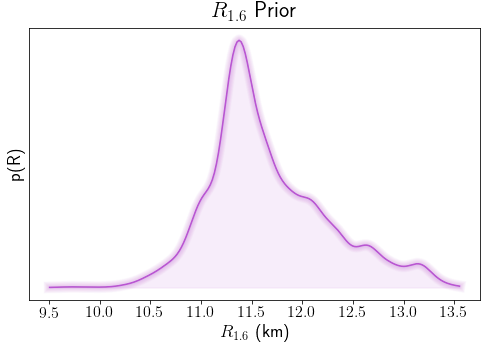

In [4]:
## get the Dietrich et al. (2020) multimessenger prior for R_1.6
Rs_mm, Rprior_kernel, R16samples = load_Rprior(hbpmloc+'/priors/R16_prior.txt',return_samples=True)

In [5]:
## fine grid
fs = np.linspace(1.5,4,200)
Ms = np.linspace(0.8,1.8,200)
Rs = np.linspace(9,15,200)

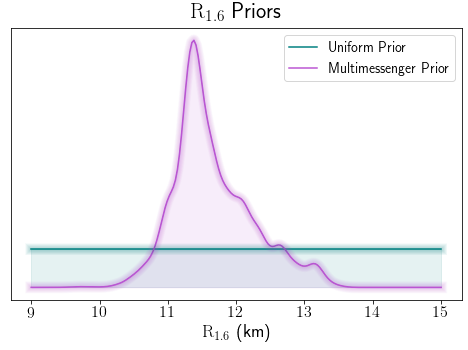

In [6]:
## plot both R16 priors
uniform_Rprior = st.uniform(loc=9,scale=6)
Rs_broad = np.linspace(9,15,200)
plt.figure()
plt.title("$\mathrm{R_{1.6}}$ Priors") #,fontsize=22,y=1.01)
plt.gca().set_yticks([])
plt.plot(Rs_broad,uniform_Rprior.pdf(Rs_broad),color='teal',label='Uniform Prior')
plt.plot(Rs_broad,Rprior_kernel.pdf(Rs_broad),color='mediumorchid',label='Multimessenger Prior')
plt.xlabel('$\mathrm{R_{1.6}}$ (km)')
plt.legend(loc='upper right')
mplcyberpunk.add_glow_effects()
# plt.savefig('./figures/R_priors.pdf',bbox_inches='tight')
# plt.savefig('./figures/R_priors.png',bbox_inches='tight')
plt.show()

In [8]:
## get the fpeak prior
with open(hbpmloc+'/priors/fprior.pickle','rb') as f:
    fprior = dill.load(f)

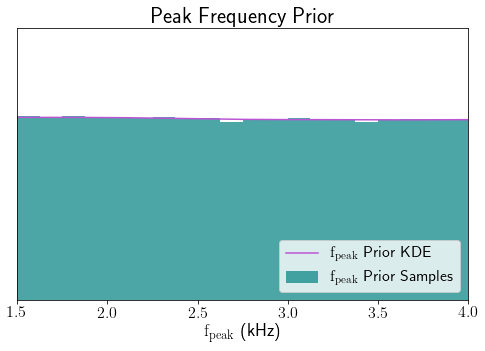

In [20]:
## plot the fpeak prior
plt.figure()
plt.plot(fs,fprior.pdf(fs),label='$\\mathrm{f_{peak}}$ Prior KDE')
plt.hist(fprior.samples,density=True,alpha=0.7,label='$\mathrm{f_{peak}}$'+' Prior Samples',bins=20)
plt.xlabel('$\mathrm{f_{peak}}$ (kHz)')
plt.xlim(1.5,4)
plt.ylim(0,0.6)
plt.yticks([])
plt.title('Peak Frequency Prior')
plt.legend(loc='lower right')
plt.savefig('./figures/fpeak_noise_prior.pdf',bbox_inches='tight')
plt.savefig('./figures/fpeak_noise_prior.png',bbox_inches='tight')
plt.show()

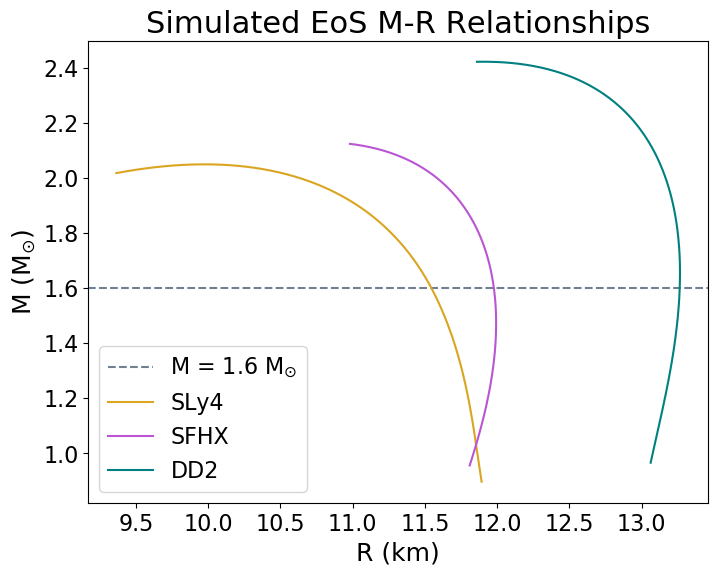

In [138]:
## EoS M-R curves
## load EoS data
dataloc = '/mnt/c/Users/Alexander/Documents/LIGO/PM/hbpm/Soultanis-PM-Simulation-Files/EoS_MR_data/'
sfhx_data = np.loadtxt(dataloc+'sfhx.coldm_fixed.tov')
dd2_data = np.loadtxt(dataloc+'dd2.coldm_fixed.tov')
sly4_data = np.loadtxt(dataloc+'ppsly.cold.tov')
## get M and R
## R in GU, multiply by conversion factor to get km (see readme.txt in dataloc)
## M is gravitational mass in Mo
R_sfhx = sfhx_data[:,1]*1.476581
M_sfhx = sfhx_data[:,2]
R_dd2 = dd2_data[:,1]*1.476581
M_dd2 = dd2_data[:,2]
R_sly4 = sly4_data[:,1]*1.476581
M_sly4 = sly4_data[:,2]
plt.figure(figsize=(8,6))
plt.axhline(1.6,color='slategrey',ls='--',label='M = 1.6 $\mathrm{M_{\odot}}$')
plt.plot(R_sly4,M_sly4,color='goldenrod',label='SLy4')
plt.plot(R_sfhx,M_sfhx,color='mediumorchid',label='SFHX')
plt.plot(R_dd2,M_dd2,color='teal',label='DD2')
plt.xlabel('R (km)')
plt.ylabel('M ($\mathrm{M_{\odot}}$)')
plt.title('Simulated EoS M-R Relationships')
plt.legend()
plt.savefig('./figures/MR_diagram_sim_EoSs.pdf',bbox_inches='tight')
plt.savefig('./figures/MR_diagram_sim_EoSs.png',bbox_inches='tight')
plt.show()

In [139]:
## build interpolators and get R_1.6
sfhx_int = interp1d(M_sfhx,R_sfhx)
sly4_int = interp1d(M_sly4,R_sly4)
dd2_int = interp1d(M_dd2,R_dd2)
print((sly4_int(1.6),sfhx_int(1.6),dd2_int(1.6)))

(array(11.54376869), array(11.9770964), array(13.26328483))


In [144]:
ev_par_loc = hbpmloc+'/nr_files/'
sly4_event_list = pd.read_csv(hbpmloc+'/nr_files/sly4_event_parameters.csv')
sfhx_event_list = pd.read_csv(hbpmloc+'/nr_files/sfhx_event_parameters.csv')
dd2_event_list = pd.read_csv(hbpmloc+'/nr_files/dd2_event_parameters.csv')

In [147]:
sfhx_event_list.head()

,file,fpeak,q,m1,m2
0,sfhx_mtot2times1.0000_q0.7000_id2poles.dat,2608.379372,0.7,0.823529,1.176471
1,sfhx_mtot2times1.0200_q0.7000_id2poles.dat,2624.536774,0.7,0.840000,1.200000
2,sfhx_mtot2times1.0400_q0.7000_id2poles.dat,2470.607545,0.7,0.856471,1.223529
3,sfhx_mtot2times1.0600_q0.7000_id2poles.dat,2675.881643,0.7,0.872941,1.247059
4,sfhx_mtot2times1.0800_q0.7000_id2poles.dat,2470.817827,0.7,0.889412,1.270588


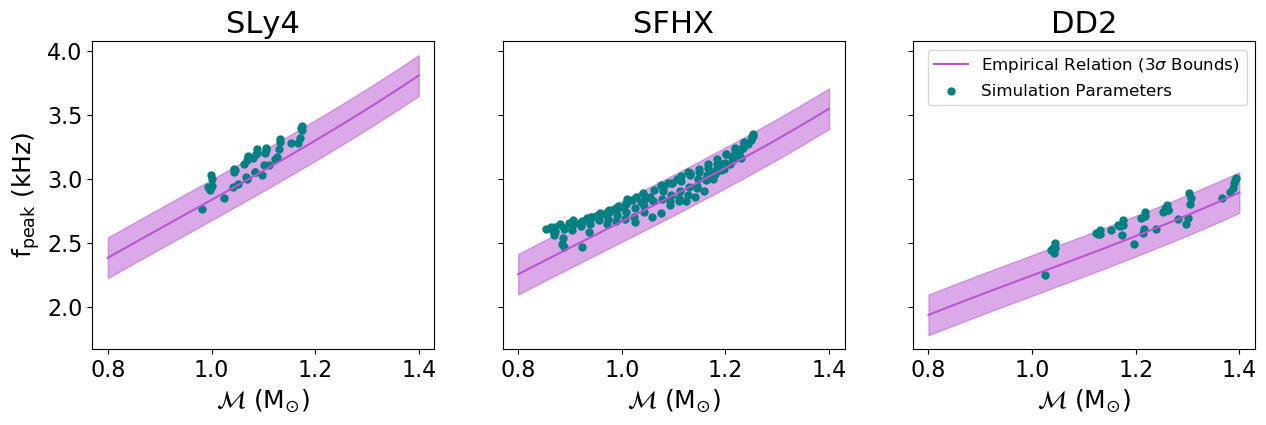

In [161]:
## EoS + NR sims multiplot figure
sigma_f = 0.053 ##Vretinaris sigma_f
fig, axes = plt.subplots(1,3,figsize=(15,4),sharey=True)
for eos, ax, Rtrue, eos_list in zip(['SLy4','SFHX','DD2'],axes.flatten(),
                                  [11.544,11.977,13.263],[sly4_event_list,sfhx_event_list,dd2_event_list]):
    ## get arrays of true Mchirp and fpeak values
    ftrue = eos_list['fpeak']/1000
    Mtrue = calc_Mchirp(eos_list['m1'],eos_list['m2'])
    Ms = np.linspace(0.8,1.4,100)
    f_mean = empirical_relation_f(Rtrue,Ms)
    f_upper = f_mean + 3*sigma_f
    f_lower = f_mean - 3*sigma_f
    ax.plot(Ms,f_mean,label='Empirical Relation ($3\sigma$ Bounds)',color='mediumorchid')
    ax.fill_between(Ms,f_upper,f_lower,alpha=0.5,color='mediumorchid')
    ax.scatter(Mtrue,ftrue,s=25,label='Simulation Parameters',color='teal')
    if eos=='SLy4':
        ax.set_ylabel('$\mathrm{f_{peak}}$ (kHz)')#,fontsize=16)
    ax.set_xlabel('$\mathcal{M}$ $\mathrm{(M_{\odot})}$')#,fontsize=16)#M_{chirp}$')
    ax.set_title(eos)#,fontsize=14)
    if eos=='DD2':
        ax.legend(fontsize=12)
# fig.suptitle('Peak Frequency and Chirp Mass for All Simulations by EoS',fontsize=16)
# fig.legend(['Empirical Relation with 3 sigma bounds','Simulation Parameters'])
# plt.tight_layout()
# plt.tight_layout(rect=[0, 0.03, 1, 0.92])
# plt.savefig('../Aux_notebooks/figures/all_eos_sim_params.pdf',bbox_inches = "tight")
plt.savefig('./figures/all_eos_sim_params.pdf',bbox_inches='tight')
plt.savefig('./figures/all_eos_sim_params.png',bbox_inches='tight')
plt.show()

In [18]:
## noise curves
noisedir = '/mnt/c/Users/Alexander/Documents/LIGO/PM/Noise_Curves/'
noisedict = {}
senses = ['O3L1','O3H1','O4','Design','2x','2.5x','3x','Voyager','NEMO','CE','ET']
files = ['aligo_O3actual_L1.txt','aligo_O3actual_H1.txt','interp_aligo_O4high.txt','interp_AplusDesign.txt',
         'interp_AplusDesign-x5.00e-01.txt','interp_AplusDesign-x4.00e-01.txt','interp_AplusDesign-x3.30e-01.txt',
        'voyager.txt','NEMO_strain.txt','cosmic_explorer.txt','einstein_telescope.txt']

In [19]:
for sense, file in zip(senses,files):
    noisedict[sense] = np.loadtxt(noisedir+file)

In [20]:
noisedict.keys()

dict_keys(['O3L1', 'O3H1', 'O4', 'Design', '2x', '2.5x', '3x', 'Voyager', 'NEMO', 'CE', 'ET'])

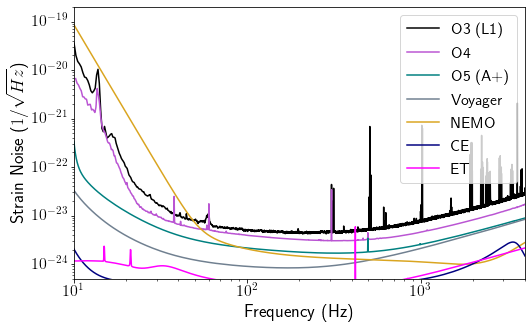

In [21]:
keys = ['O3L1','O4','Design','Voyager','NEMO','CE','ET']
colors=['black','mediumorchid','teal','slategrey','goldenrod','navy','magenta']
names = ['O3 (L1)','O4','O5 (A+)','Voyager','NEMO','CE','ET']
plt.figure()
for key,color,name in zip(keys,colors,names):
    plt.plot(noisedict[key][:,0],noisedict[key][:,1],label=name,color=color)
plt.yscale('log')
plt.xscale('log')
plt.ylim(top=1e-19)#,1e-19)
plt.ylim(5e-25,2e-19)
plt.xlim(1e1,4000)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Strain Noise ($1/\sqrt{Hz}$)')
plt.legend(loc='upper right')
# plt.savefig('./figures/all_noise_curves.pdf',bbox_inches='tight')
# plt.savefig('./figures/all_noise_curves.png',bbox_inches='tight')
plt.show()

Peak frequency demo plot

In [22]:
calc_Mchirp(parse_mstr('103109')[0],parse_mstr('103109')[1])

0.9223400379980135

In [23]:
spec_50, psd_50, inj_50 = get_reconstruction_data(
    '/mnt/c/Users/Alexander/Documents/LIGO/PM/hbpm/analysis_2022/bayeswave_figure_data/Aplus_103109_50Mpc/')

In [24]:
inj_50[np.argmax(np.abs(inj_50[:,1])),0]

2667.0

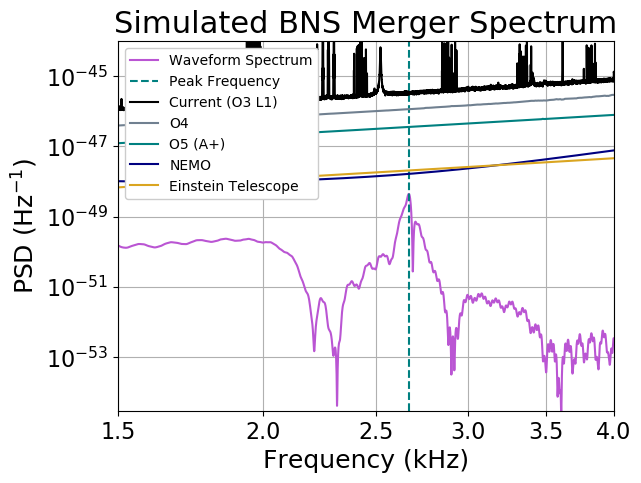

In [175]:
plt.style.use('default')
matplotlib.rcParams['xtick.labelsize'] = 16.0
matplotlib.rcParams['ytick.labelsize'] = 16.0
matplotlib.rcParams['axes.labelsize'] = 18.0
# matplotlib.rcParams['legend.fontsize'] = 16
matplotlib.rcParams['axes.titlesize'] = 22
matplotlib.rcParams['axes.prop_cycle'] = matplotlib.cycler(color=["mediumorchid", "teal", "goldenrod","slategray"])
plt.figure()
## waveform
plt.plot(inj_50[:,0],4*np.abs(inj_50[:,1]),color='mediumorchid',label='Waveform Spectrum')
# plt.semilogy(psd_50[0],4*psd_50[1],color='k',ls='-',label='Detector PSD')
plt.grid()
plt.axvline(inj_50[np.argmax(np.abs(inj_50[:,1])),0], ls='--', color='teal', label='Peak Frequency')
## noise curves
plt.plot(noisedict['O3L1'][:,0],noisedict['O3L1'][:,1]**2,label='Current (O3 L1)',color='black')
plt.plot(noisedict['O4'][:,0],noisedict['O4'][:,1]**2, label='O4',color='slategray')
plt.plot(noisedict['Design'][:,0],noisedict['Design'][:,1]**2, label='O5 (A+)',color='teal')
plt.plot(noisedict['NEMO'][:,0],noisedict['NEMO'][:,1]**2,label='NEMO',color='navy')
# plt.plot(noisedict['Voyager'][:,0],0.25*noisedict['Voyager'][:,1]**2,label='LIGO Voyager',color='slategrey')
# # plt.plot(noisedict['CE'][:,0],(noisedict['CE'][:,0])**(-1) * noisedict['CE'][:,1]**2,
# #          label='Cosmic Explorer',color='magenta')
plt.plot(noisedict['ET'][:,0],noisedict['ET'][:,1]**2,label='Einstein Telescope',color='goldenrod')
plt.xscale('log')
plt.yscale('log')
ax = plt.gca()
ax.set_xticks(ticks=[1.5e3,2e3,2.5e3,3e3,3.5e3,4e3])#,labels=)
ax.set_xticklabels([1.5,2.0,2.5,3.0,3.5,4.0])
plt.xlim(1.5e3,4e3)
plt.xlabel('Frequency (kHz)')
plt.ylabel('PSD ($\mathrm{Hz}^{-1}$)')
plt.title("Simulated BNS Merger Spectrum")# ($D_L = 50$ Mpc, $\mathcal{M}=0.92 M_{\odot}$)",fontsize=11)
plt.legend(loc='upper left',framealpha=1)
plt.ylim(3e-55,1e-44)
plt.savefig('./figures/103109_inj_SFHX_spectrum_withPSDs.png',bbox_inches='tight')
plt.savefig('./figures/103109_inj_SFHX_spectrum_withPSDs.pdf',bbox_inches='tight')
plt.show()


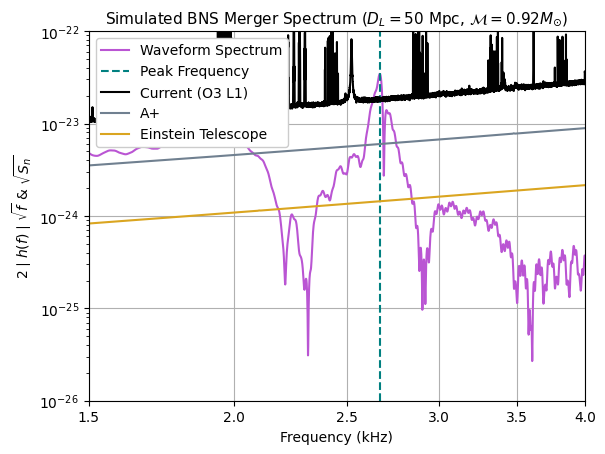

In [11]:
plt.style.use('default')
plt.figure()
## waveform
# factor = (50**2)/(20**2)
plt.plot(inj_50[:,0],2*np.sqrt(np.abs(inj_50[:,1]))*np.sqrt(inj_50[:,0]),color='mediumorchid',label='Waveform Spectrum')
# plt.plot(inj_50[:,0],np.sqrt(np.abs(inj_50[:,1])),color='mediumorchid',label='Waveform Spectrum')
# plt.semilogy(psd_50[0],np.sqrt(psd_50[1])*np.sqrt(psd_50[0]),color='k',ls='-',label='Detector PSD')
# plt.semilogy(psd_50[0],2*np.sqrt(psd_50[1]),color='k',ls='-',label='Detector PSD')
plt.grid()
plt.xlabel('Frequency (kHz)')
plt.ylabel('$2 \mid h(f) \mid \sqrt{f}$ & $\sqrt{S_n}$')
plt.axvline(inj_50[np.argmax(np.abs(inj_50[:,1])),0], ls='--', color='teal', label='Peak Frequency')
## noise curves
plt.plot(noisedict['O3L1'][:,0],noisedict['O3L1'][:,1],
         label='Current (O3 L1)',color='black')
plt.plot(noisedict['Design'][:,0],noisedict['Design'][:,1],
         label='A+',color='slategrey')
# plt.plot(noisedict['Voyager'][:,0],noisedict['Voyager'][:,1],
#          label='LIGO Voyager',color='slategrey')
# plt.plot(noisedict['CE'][:,0],(noisedict['CE'][:,0])**(-1) * noisedict['CE'][:,1]**2,
#          label='Cosmic Explorer',color='magenta')
plt.plot(noisedict['ET'][:,0],noisedict['ET'][:,1],
         label='Einstein Telescope',color='goldenrod')
# plt.xscale('log')
plt.xscale('log')
plt.yscale('log')
ax = plt.gca()
ax.set_xticks(ticks=[1.5e3,2e3,2.5e3,3e3,3.5e3,4e3],labels=[1.5,2.0,2.5,3.0,3.5,4.0])
plt.xlim(1.5e3,4e3)
plt.title("Simulated BNS Merger Spectrum ($D_L = 50$ Mpc, $\mathcal{M}=0.92 M_{\odot}$)",fontsize=11)
plt.legend(loc='upper left',framealpha=1)
plt.ylim(1e-26,1e-22)
# plt.savefig('./figures/1031097_inj_SFHX_spectrum_strain_withSSDs.pdf',bbox_inches='tight')
plt.show()


### 3-panel plots for the O4O5 sims

In [6]:
help(load_posterior_pickle)

Help on function load_posterior_pickle in module hbpm_utils:

load_posterior_pickle(post_pickle)
    Utility function to load all .pickle files in a specified directory. 
    Note: intended for use with specific simulations, may need to be extended later.
    
    Arguments:
        post_pickle (str) : '/path/to/pickle/file.pickle'
    
    Returns:
        post_dict (dict) : Unpickled posterior eventdict



In [13]:
dictdict = {'sfhx':{},'dd2':{},'sly4':{}}

In [14]:
resultspath = './paper_data/analysis/'

In [15]:
eoss = ['sfhx','dd2','sly4']
runs = ['O4','O5']

In [16]:
base = 'O4O5_HLV_'
for eos in eoss:
    for run in runs:
        name = base+eos+run+'/posterior_eventdict.pickle'
        dictdict[eos][run] = load_posterior_pickle(resultspath+name)
        Ri, Rpi, likelisti = unpack_posterior_dict(dictdict[eos][run])
        dictdict[eos][run]['likes'] = likelisti

In [17]:
likes_dd2 = [*dictdict['dd2']['O4']['likes'],*dictdict['dd2']['O5']['likes']]
likes_sfhx = [*dictdict['sfhx']['O4']['likes'],*dictdict['sfhx']['O5']['likes']]
likes_sly4 = [*dictdict['sly4']['O4']['likes'],*dictdict['sly4']['O5']['likes']]

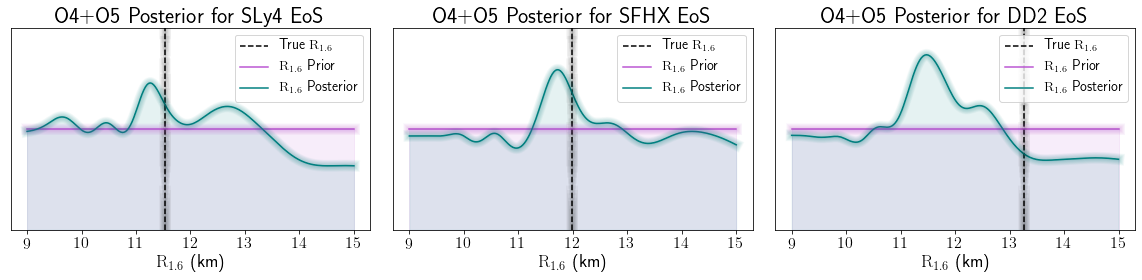

In [25]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(16,4),sharey=True)
# ticks = 
plot_aggregate_posterior_on_ax(Rs,likes_sly4,uniform_Rprior,Rtrue=11.54,ax=ax1,legend_loc='upper right',
                         title='O4+O5 Posterior for SLy4 EoS')#,Rticks=[9.5,10,10.5,11,11.5,12,12.5,13,13.5])
plot_aggregate_posterior_on_ax(Rs,likes_sfhx,uniform_Rprior,Rtrue=11.98,ax=ax2,legend_loc='upper right',
                         title='O4+O5 Posterior for SFHX EoS')#,Rticks=[9.5,10,10.5,11,11.5,12,12.5,13,13.5])
plot_aggregate_posterior_on_ax(Rs,likes_dd2,uniform_Rprior,Rtrue=13.26,ax=ax3,legend_loc='upper right',
                         title='O4+O5 Posterior for DD2 EoS')#,Rticks=[9.5,10,10.5,11,11.5,12,12.5,13,13.5])
ax1.set_ylim(0,0.01)
# ax1.set_ylim()
plt.tight_layout()
plt.savefig('./figures/O4O5_allEoS_3panel.png',bbox_inches='tight')
plt.savefig('./figures/O4O5_allEoS_3panel.pdf',bbox_inches='tight')
plt.show()

In [84]:
help(get_post_stats)

Help on function get_post_stats in module hbpm_utils:

get_post_stats(post_dist, Rs, bounds=(0.025, 0.975), verbose=True, latex=False)
    Function to get the posterior mean and confidence interval (default 95%).
    
    Arguments:
        post_dist (array) : R_1.6 posterior distribution
        Rs (array) : R values at which post_dist is evaluated
        bounds (tuple) : (lower limit,upper limit) of confidence interval. Default gives 95% C.I..
        verbose (bool) : Whether to print results.
        latex (bool) : If printing results, whether to output as an easily copied LaTeX string.
        
    Returns:
        mean (float) : Posterior mean
        lower (float) : Lower confidence interval bound
        upper (float) : Upper confidence interval bound



In [26]:
for eos, like in zip(['sly4','sfhx','dd2'],[likes_sly4,likes_sfhx,likes_dd2]):
    print(eos)
    get_post_stats(get_posterior(Rs,get_aggregate_likelihood(like),uniform_Rprior),
                                     Rs,latex=True,verbose=True,bounds=(0.025,0.975))

sly4
$\R=11.79^{+2.97}_{-2.64}$
sfhx
$\R=11.99^{+2.83}_{-2.83}$
dd2
$\R=11.82^{+2.97}_{-2.66}$


In [27]:
get_post_stats(uniform_Rprior.pdf(Rs),Rs,latex=True,verbose=True,bounds=(0.025,0.975))

$\R=12.00^{+2.85}_{-2.85}$


(12.0, 9.149707485374268, 14.849992499624982)

Now just SFHX:

In [29]:
O4_SFHX = dictdict['sfhx']['O4'].copy()
O4_SFHX.pop('likes')
O5_SFHX = dictdict['sfhx']['O5'].copy()
O5_SFHX.pop('likes')
O4O5_SFHX = {**O4_SFHX,**O5_SFHX}
SFHX_metadict = {'O4':O4_SFHX,'O5':O5_SFHX,'O4O5':O4O5_SFHX}

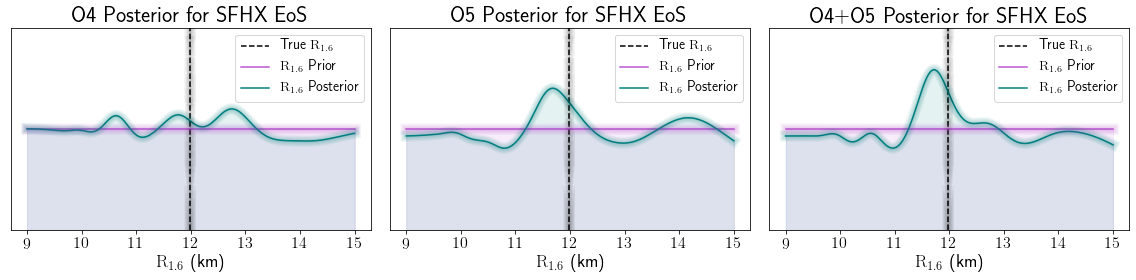

In [34]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(16,4),sharey=True)
# ticks = 
plot_aggregate_posterior_on_ax(Rs,dictdict['sfhx']['O4']['likes'],uniform_Rprior,Rtrue=11.98,ax=ax1,
                               legend_loc='upper right',title='O4 Posterior for SFHX EoS')
#                          title='O4+O5 Posterior for SLy4 EoS')#,Rticks=[9.5,10,10.5,11,11.5,12,12.5,13,13.5])
plot_aggregate_posterior_on_ax(Rs,dictdict['sfhx']['O5']['likes'],uniform_Rprior,Rtrue=11.98,ax=ax2,
                               legend_loc='upper right',title='O5 Posterior for SFHX EoS')
#                          title='O4+O5 Posterior for SFHX EoS')#,Rticks=[9.5,10,10.5,11,11.5,12,12.5,13,13.5])
plot_aggregate_posterior_on_ax(Rs,likes_sfhx,uniform_Rprior,Rtrue=11.98,ax=ax3,legend_loc='upper right',
                               title='O4+O5 Posterior for SFHX EoS')#,Rticks=[9.5,10,10.5,11,11.5,12,12.5,13,13.5])
ax1.set_ylim(0,0.01)
# ax1.set_ylim()
plt.tight_layout()
plt.savefig('./figures/O4O5_sfhx_3panel.png',bbox_inches='tight')
plt.savefig('./figures/O4O5_sfhx_3panel.pdf',bbox_inches='tight')
plt.show()

In [33]:
for run, like in zip(['O4','O5','O4O5'],[dictdict['sfhx']['O4']['likes'],dictdict['sfhx']['O5']['likes'],likes_sfhx]):
    print(run)
    get_post_stats(get_posterior(Rs,get_aggregate_likelihood(like),uniform_Rprior),
                                     Rs,latex=True,verbose=True,bounds=(0.025,0.975))

O4
$\R=11.95^{+2.89}_{-2.80}$
O5
$\R=12.04^{+2.79}_{-2.88}$
O4O5
$\R=11.99^{+2.83}_{-2.83}$


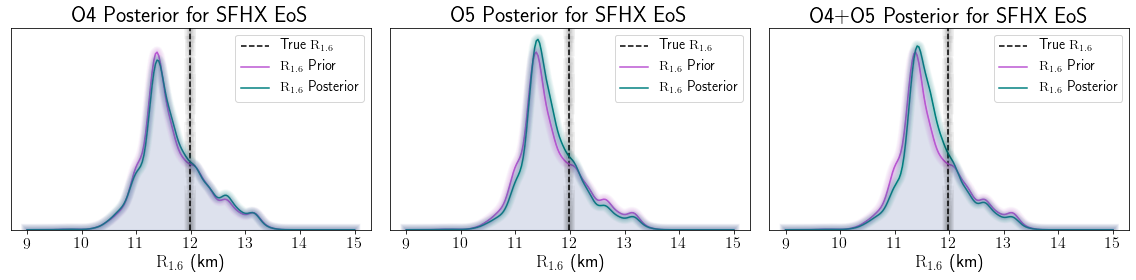

In [36]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(16,4),sharey=True)
# ticks = 
ax1.set_ylim(0,0.02)
plot_aggregate_posterior_on_ax(Rs,dictdict['sfhx']['O4']['likes'],Rprior_kernel,Rtrue=11.98,ax=ax1,
                               legend_loc='upper right',title='O4 Posterior for SFHX EoS')
#                          title='O4+O5 Posterior for SLy4 EoS')#,Rticks=[9.5,10,10.5,11,11.5,12,12.5,13,13.5])
plot_aggregate_posterior_on_ax(Rs,dictdict['sfhx']['O5']['likes'],Rprior_kernel,Rtrue=11.98,ax=ax2,
                               legend_loc='upper right',title='O5 Posterior for SFHX EoS')
#                          title='O4+O5 Posterior for SFHX EoS')#,Rticks=[9.5,10,10.5,11,11.5,12,12.5,13,13.5])
plot_aggregate_posterior_on_ax(Rs,likes_sfhx,Rprior_kernel,Rtrue=11.98,ax=ax3,legend_loc='upper right',
                               title='O4+O5 Posterior for SFHX EoS')#,Rticks=[9.5,10,10.5,11,11.5,12,12.5,13,13.5])
# ax1.set_ylim()
plt.tight_layout()
plt.savefig('./figures/O4O5_sfhx_mmprior_3panel.png',bbox_inches='tight')
plt.savefig('./figures/O4O5_sfhx_mmprior_3panel.pdf',bbox_inches='tight')
plt.show()

In [37]:
sfhx_bounds = []
for run, like in zip(['O4','O5','O4O5'],[dictdict['sfhx']['O4']['likes'],dictdict['sfhx']['O5']['likes'],likes_sfhx]):
    print(run)
    bounds_i = get_post_stats(get_posterior(Rs,get_aggregate_likelihood(like),Rprior_kernel),
                                     Rs,latex=True,verbose=True,bounds=(0.025,0.975))
    sfhx_bounds.append(bounds_i)

O4
$\R=11.68^{+1.39}_{-1.01}$
O5
$\R=11.66^{+1.35}_{-0.91}$
O4O5
$\R=11.68^{+1.32}_{-0.94}$


In [38]:
bounds_prior_mm = get_post_stats(Rprior_kernel.pdf(Rs),Rs,latex=True,verbose=True,bounds=(0.025,0.975))

$\R=11.66^{+1.43}_{-0.98}$


In [39]:
bounds_prior_u = get_post_stats(uniform_Rprior.pdf(Rs),Rs,latex=True,verbose=True,bounds=(0.025,0.975))

$\R=12.00^{+2.85}_{-2.85}$


In [40]:
width_sfhx_mm = (sfhx_bounds[-1][2] - sfhx_bounds[-1][1])
width_prior_mm = (bounds_prior_mm[2] - bounds_prior_mm[1])
width_sfhx_mm, width_prior_mm, width_prior_mm - width_sfhx_mm

(2.265713285664283, 2.407020351017552, 0.14130706535326887)

### A+ 4yr

In [41]:
## load and combine
badkeys = ['eos', 'Rs', 'prior']
Aplus_4yr_datapath = './paper_data/analysis/'
namebase = 'Aplus_4yr_HLV'
pt1_postdict = load_posterior_pickle(Aplus_4yr_datapath+namebase+'_pt1/posterior_eventdict.pickle')
pt2_postdict = load_posterior_pickle(Aplus_4yr_datapath+namebase+'_pt2/posterior_eventdict.pickle')
goodkeys_pt1 = [key for key in pt1_postdict.keys() if key not in badkeys]
goodkeys_pt2 = [key for key in pt2_postdict.keys() if key not in badkeys]
unnormed_likes_pt1 = []
for key in goodkeys_pt1:
    unnormed_likes_pt1.append(pt1_postdict[key]['likelihood_i'])
unnormed_likes_pt2 = []
for key in goodkeys_pt2:
    unnormed_likes_pt2.append(pt2_postdict[key]['likelihood_i'])
Aplus_4yr_likes = [*unnormed_likes_pt1,*unnormed_likes_pt2]

In [42]:
Aplus_4yr_likes = [*unnormed_likes_pt1,*unnormed_likes_pt2]

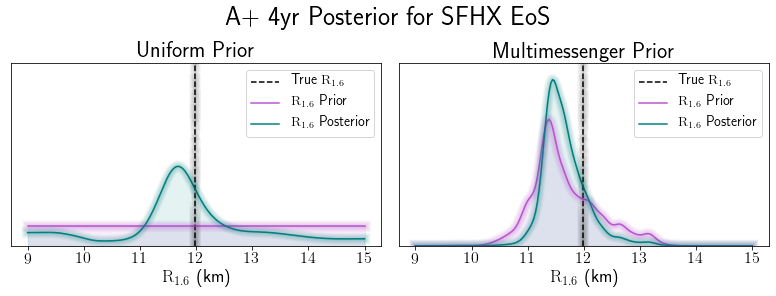

In [43]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(32/3,4),sharey=True,constrained_layout=True)
fig.suptitle('A+ 4yr Posterior for SFHX EoS',fontsize=26)
# plot_aggregate_posterior_on_ax(Rs,likes_sly4,uniform_Rprior,Rtrue=11.54,ax=ax1,legend_loc='upper right',
#                          title='O4+O5 Posterior for sly4 EoS')#,Rticks=[9.5,10,10.5,11,11.5,12,12.5,13,13.5])
plot_aggregate_posterior_on_ax(Rs,Aplus_4yr_likes,uniform_Rprior,Rtrue=11.98,ax=ax1,legend_loc='upper right',
                         title='Uniform Prior')#,Rticks=[9.5,10,10.5,11,11.5,12,12.5,13,13.5])
plot_aggregate_posterior_on_ax(Rs,Aplus_4yr_likes,Rprior_kernel,Rtrue=11.98,ax=ax2,legend_loc='upper right',
                         title='Multimessenger Prior')
# plot_aggregate_posterior_on_ax(Rs,likes_dd2,uniform_Rprior,Rtrue=13.26,ax=ax3,legend_loc='upper right',
#                          title='O4+O5 Posterior for dd2 EoS')#,Rticks=[9.5,10,10.5,11,11.5,12,12.5,13,13.5])
# ax1.set_ylim()
# plt.tight_layout()
# plt.savefig('./figures/Aplus_4yr_2panel_posterior.png',bbox_inches='tight')
# plt.savefig('./figures/Aplus_4yr_2panel_posterior.pdf',bbox_inches='tight')
plt.show()

In [44]:
bounds_Ap4yr_mm = get_post_stats(get_posterior(Rs,get_aggregate_likelihood(Aplus_4yr_likes),Rprior_kernel),
                                     Rs,latex=True,verbose=True,bounds=(0.025,0.975))
bounds_Ap4yr_u = get_post_stats(get_posterior(Rs,get_aggregate_likelihood(Aplus_4yr_likes),uniform_Rprior),
                                     Rs,latex=True,verbose=True,bounds=(0.025,0.975))
bounds_prior_mm = get_post_stats(Rprior_kernel.pdf(Rs),Rs,latex=True,verbose=True,bounds=(0.025,0.975))

$\R=11.65^{+1.01}_{-0.61}$
$\R=11.85^{+2.72}_{-2.63}$
$\R=11.66^{+1.43}_{-0.98}$


In [45]:
bounds_Ap4yr_mm

(11.651723271136868, 11.043402170108505, 12.658382919145957)

In [46]:
width_Ap4yr_mm = (bounds_Ap4yr_mm[2] - bounds_Ap4yr_mm[1])
width_prior_mm = (bounds_prior_mm[2] - bounds_prior_mm[1])

In [47]:
width_Ap4yr_mm, width_prior_mm, width_prior_mm - width_Ap4yr_mm

(1.6149807490374517, 2.407020351017552, 0.7920396019801004)

In [49]:
(width_prior_mm - width_Ap4yr_mm)/width_prior_mm

0.32905396983671986

## Empirical Relation Plot

In [72]:
def empirical_relation_new(R,M):
    f = 7.713720 + -5.406674*M + 13.325646*M**2 + -1.192276*R*M + -2.846030*M**3 + -0.111244*R*M**2 + 0.038749*R**2*M
    return f

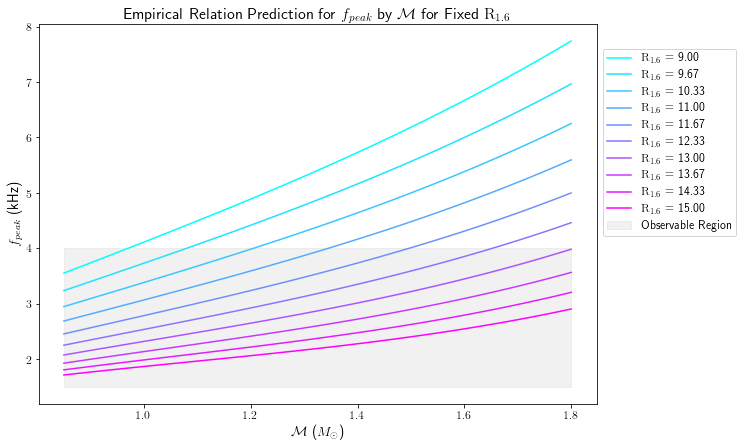

In [71]:
Rs2 = np.linspace(9,15,10)
Ms2 = np.linspace(0.85,1.8,100)
plt.figure(figsize=(10,7))
cmap = matplotlib.cm.get_cmap('cool')
for R in Rs2:
    colnum = (R - Rs2.min())/(Rs2.max() - Rs2.min())
    plt.plot(Ms2,empirical_relation_f(R,Ms2),label='$\mathrm{R_{1.6}}$'+' = {:0.2f}'.format(R),color=cmap(colnum))
plt.fill_between(Ms2,1.5,4,color='lightgrey',alpha=0.3,label='Observable Region')
plt.legend(bbox_to_anchor=(1,.95))
plt.ylabel('$f_{peak}$ (kHz)')
plt.xlabel('$\mathcal{M}$ ($M_{\odot}$)')
plt.title('Empirical Relation Prediction for $f_{peak}$ by $\mathcal{M}$ for Fixed $\mathrm{R_{1.6}}$')
# plt.savefig('./figures/empirical_relation_fixedR.pdf',bbox_inches='tight')
plt.show()

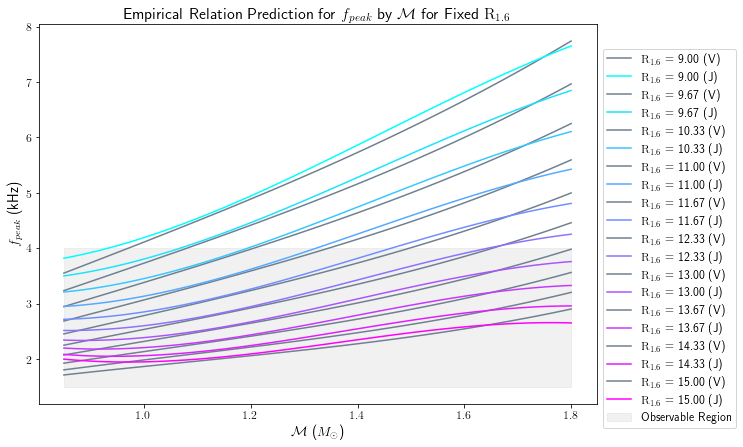

In [75]:
Rs2 = np.linspace(9,15,10)
Ms2 = np.linspace(0.85,1.8,100)
plt.figure(figsize=(10,7))
cmap = matplotlib.cm.get_cmap('cool')
for R in Rs2:
    colnum = (R - Rs2.min())/(Rs2.max() - Rs2.min())
    plt.plot(Ms2,empirical_relation_f(R,Ms2),label='$\mathrm{R_{1.6}}$'+' = {:0.2f} (V)'.format(R),color='slategrey')
    plt.plot(Ms2,empirical_relation_new(R,Ms2),label='$\mathrm{R_{1.6}}$'+' = {:0.2f} (J)'.format(R),color=cmap(colnum))
plt.fill_between(Ms2,1.5,4,color='lightgrey',alpha=0.3,label='Observable Region')
plt.legend(bbox_to_anchor=(1,.95))
plt.ylabel('$f_{peak}$ (kHz)')
plt.xlabel('$\mathcal{M}$ ($M_{\odot}$)')
plt.title('Empirical Relation Prediction for $f_{peak}$ by $\mathcal{M}$ for Fixed $\mathrm{R_{1.6}}$')
# plt.savefig('./figures/empirical_relation_fixedR.pdf',bbox_inches='tight')
plt.show()

In [38]:
## load the not-bootstrap bootstrap
## really need a new name for this
## should also make a function to do this & put the samples in the hbpm_v2 directory
coeffs = pd.read_csv(
    '/mnt/c/Users/Alexander/Documents/LIGO/PM/hbpm/analysis_2022/empirical_relation_samples/sampled_coefficients_v05.tab',
    sep=' ')
bootstrap = coeffs.to_numpy()

In [39]:
bootstrap.shape

(1000, 6)

In [52]:
np.median(bootstrap,axis=0)

array([ 1.51184278,  8.44362491,  2.47046189, -1.11065535, -0.13475051,
        0.03678402])

In [48]:
np.mean(bootstrap,axis=0)

array([ 1.52966059,  8.37151679,  2.41523543, -1.11272227, -0.13073473,
        0.03667232])

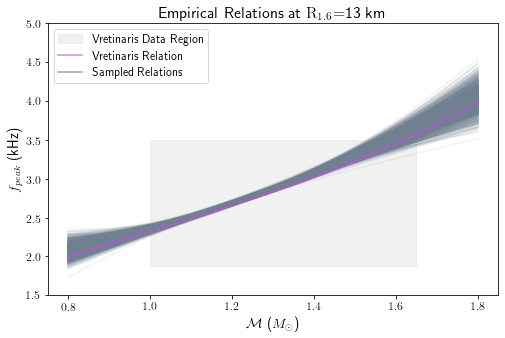

In [65]:
Rtrue = 13
plt.figure()
plt.plot(Ms,empirical_relation_bootstrap(Rtrue,Ms.reshape(-1,1),bootstrap),alpha=0.1,color='slategray',label='__nolabel__')
plt.plot(Ms,empirical_relation_f(Rtrue,Ms),color='mediumorchid',label='__nolegend__')#,
#          path_effects=[pfx.Stroke(linewidth=1.5, foreground='w'),pfx.Normal()])
plt.fill_between(np.linspace(1.0,1.65,50),1.88,3.5,color='lightgrey',alpha=0.3,label='Vretinaris Data Region')
gray_line = mlines.Line2D([], [], color='slategray',alpha=0.7,label='Sampled Relations')
magenta_line = mlines.Line2D([], [], color='mediumorchid',alpha=0.7,label='Vretinaris Relation')
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles=handles+[magenta_line,gray_line],loc='upper left')
plt.ylim(1.5,5)
plt.ylabel('$f_{peak}$ (kHz)')
plt.xlabel('$\mathcal{M}$ ($M_{\odot}$)')
plt.title('Empirical Relations at $\mathrm{R_{1.6}}$'+'={} km'.format(Rtrue))
plt.savefig('./figures/empirical_relation_samples.pdf',bbox_inches='tight')
plt.savefig('./figures/empirical_relation_samples.png',bbox_inches='tight')
plt.show()

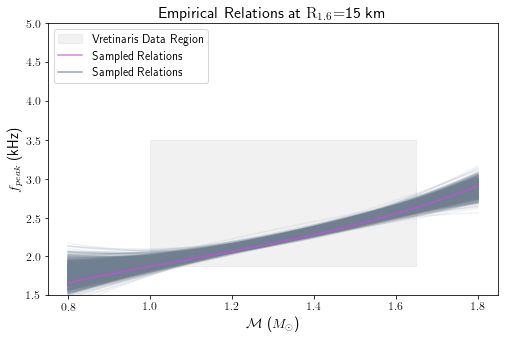

In [64]:
Rtrue = 15
plt.figure()
plt.plot(Ms,empirical_relation_bootstrap(Rtrue,Ms.reshape(-1,1),bootstrap),alpha=0.1,color='slategray',label='__nolabel__')
plt.plot(Ms,empirical_relation_f(Rtrue,Ms),color='mediumorchid',label='__nolegend__')#,
#          path_effects=[pfx.Stroke(linewidth=1.5, foreground='w'),pfx.Normal()])
plt.fill_between(np.linspace(1.0,1.65,50),1.88,3.5,color='lightgrey',alpha=0.3,label='Vretinaris Data Region')
gray_line = mlines.Line2D([], [], color='slategray',alpha=0.7,label='Sampled Relations')
magenta_line = mlines.Line2D([], [], color='mediumorchid',alpha=0.7,label='Sampled Relations')
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles=handles+[magenta_line,gray_line],loc='upper left')
plt.ylim(1.5,5)
plt.ylabel('$f_{peak}$ (kHz)')
plt.xlabel('$\mathcal{M}$ ($M_{\odot}$)')
plt.title('Empirical Relations at $\mathrm{R_{1.6}}$'+'={} km'.format(Rtrue))
# plt.savefig('./figures/empirical_relation_samples.pdf',bbox_inches='tight')
# plt.savefig('./figures/empirical_relation_samples.png',bbox_inches='tight')
plt.show()

In [42]:
help(empirical_relation_f)

Help on function empirical_relation_f in module hbpm_utils:

empirical_relation_f(R16, Mchirp)
    Function to calculate the empirical relation for fpeak in terms of R_1.6 and Mchirp.
    From table IV of Vretinaris et al. (2020) http://arxiv.org/abs/1910.10856. Note that sigma_f = 0.053
    
    Inputs:
        R16 (float)  : R_1.6 in km
        Mchirp (float) : Chirp mass in solar masses
    
    Returns:
        fpeak (float) : Empirical relation prediction for the post-merger peak frequency



In [82]:
## load the not-bootstrap bootstrap
## really need a new name for this
## should also make a function to do this & put the samples in the hbpm_v2 directory
coeffs = pd.read_csv(
    '/mnt/c/Users/Alexander/Downloads/sampled_coefficients_v05_2022-07-18.tab',
    sep=' ')
bootstrap2 = coeffs.to_numpy()

In [83]:
bootstrap2.shape

(1000, 6)

In [84]:
np.median(bootstrap2,axis=0)

array([ 1.51294702,  8.5244517 ,  2.30850424, -1.11820331, -0.1250199 ,
        0.03684145])

In [86]:
np.mean(bootstrap2,axis=0)

array([ 1.49102358,  8.50221629,  2.3052291 , -1.11554891, -0.12439856,
        0.03650169])

In [87]:
def jesse_relation(R,M):
    return 1.522 + 8.402*M + 2.388*M**2 - 1.113*R*M - 0.129*R*M**2 + 0.037*M*R**2

In [113]:
def jr_hidef(R,M,beta0,ndec=None):
    if ndec is not None:
        beta = np.round_(beta0,decimals=ndec)
    else:
        beta = beta0
    return beta[0] + beta[1]*M + beta[2]*M**2 + beta[3]*R*M + beta[4]*R*M**2 + beta[5]*M*R**2

In [88]:
def jr_mean(R,M,beta=[ 1.52966059,  8.37151679,  2.41523543, -1.11272227, -0.13073473, 0.03667232]):
    return beta[0] + beta[1]*M + beta[2]*M**2 + beta[3]*R*M + beta[4]*R*M**2 + beta[5]*M*R**2

In [89]:
def jr_median(R,M,beta=[ 1.51184278,  8.44362491,  2.47046189, -1.11065535, -0.13475051, 0.03678402]):
    return beta[0] + beta[1]*M + beta[2]*M**2 + beta[3]*R*M + beta[4]*R*M**2 + beta[5]*M*R**2

In [90]:
jesse_relation(12,1.1),jr_mean(12,1.1),jr_median(12,1.1)

(2.9498, 2.8834571737000037, 2.9984498106999995)

In [97]:
np.mean(bootstrap2,axis=0)

array([ 1.49102358,  8.50221629,  2.3052291 , -1.11554891, -0.12439856,
        0.03650169])

In [98]:
jesse_relation(12,1.1),jr_mean(12,1.1,beta=np.mean(bootstrap2,axis=0)),jr_median(12,1.1,beta=np.median(bootstrap2,axis=0))

(2.9498, 2.88314342097979, 2.9432469212023893)

In [100]:
np.sum(np.mean(bootstrap2,axis=0)*[1,1.1,1.1**2,1.1*12,12*1.1**2,1.1*12**2])

2.88314342097979

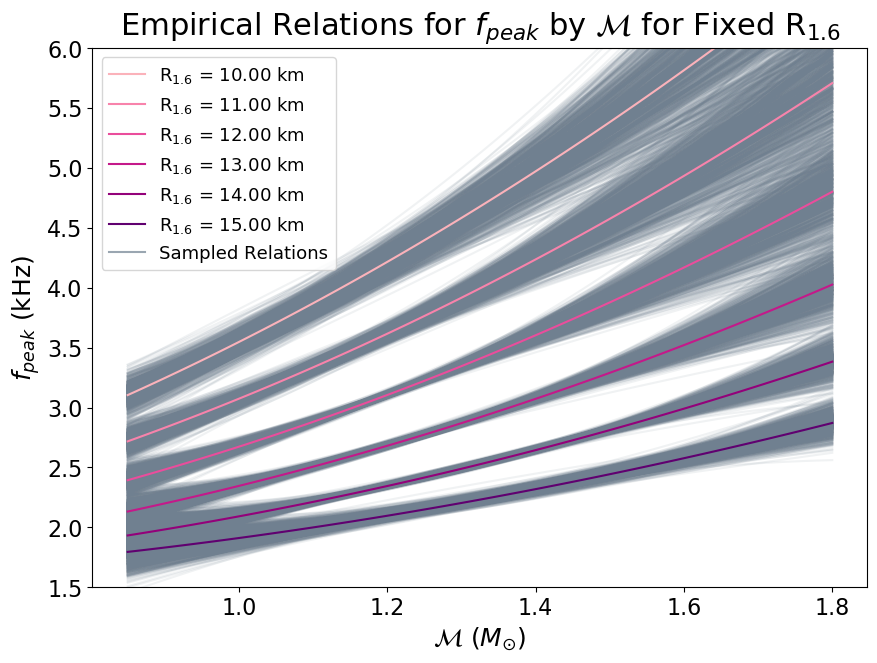

In [136]:
Rs2 = [10,11,12,13,14,15]#np.linspace(9,15,5)
Ms2 = np.linspace(0.85,1.8,100)
plt.figure(figsize=(10,7))
cmap = matplotlib.cm.get_cmap('RdPu')
for R in Rs2:
#     colnum = (R - Rs2.min())/(Rs2.max() - Rs2.min())
    colnum = (R - 7.5)/(8)
    plt.plot(Ms2,empirical_relation_bootstrap(R,Ms2.reshape(-1,1),bootstrap),alpha=0.1,
             color='slategray',label='__nolabel__',zorder=-10)
    plt.plot(Ms2,jr_hidef(R,Ms2,beta8,4),label='$\mathrm{R_{1.6}}$'+' = {:0.2f} km'.format(R),color=cmap(colnum))
#     plt.plot(Ms2,jr_mean(R,Ms2),label='$\mathrm{R_{1.6}}$'+' = {:0.2f} mean'.format(R),color=cmap(colnum),ls='--')
#     plt.plot(Ms2,jr_median(R,Ms2),label='$\mathrm{R_{1.6}}$'+' = {:0.2f} med'.format(R),color=cmap(colnum),ls=':')
#     plt.plot(Ms2,empirical_relation_new(R,Ms2),label='$\mathrm{R_{1.6}}$'+' = {:0.2f} (J)'.format(R),color=cmap(colnum))
plt.gca().set_rasterization_zorder(0)
# plt.fill_between(Ms2,1.5,4,color='lightgrey',alpha=0.3,label='Analysis Band')
plt.ylim(1.5,6)
gray_line = mlines.Line2D([], [], color='slategray',alpha=0.7,label='Sampled Relations')
# magenta_line = mlines.Line2D([], [], color='mediumorchid',alpha=0.7,label='Sampled Relations')
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles=handles+[gray_line],loc='upper left',fontsize=13)
# plt.legend(bbox_to_anchor=(1,.95))
plt.ylabel('$f_{peak}$ (kHz)',fontsize=18)
plt.xlabel('$\mathcal{M}$ ($M_{\odot}$)',fontsize=18)
plt.title('Empirical Relations for $f_{peak}$ by $\mathcal{M}$ for Fixed $\mathrm{R_{1.6}}$',
          fontsize=22,y=1.01)
plt.savefig('./figures/empirical_relation_fixedR_withsamples.pdf',bbox_inches='tight')
plt.savefig('./figures/empirical_relation_fixedR_withsamples.png',bbox_inches='tight')
plt.show()

In [105]:
jesse_relation(12,1.1)

2.9498

In [112]:
beta8 = [1.52196083, 8.40211940, 2.38758576, -1.11330828, -0.12909557, 0.03661975]

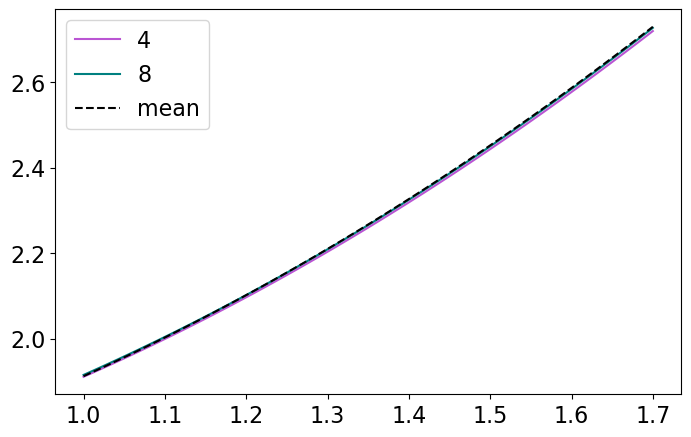

In [128]:
plt.figure()
# plt.plot(Ms2,jesse_relation(R,Ms2),label='jesse')
for dec in [4,8]:
    plt.plot(Ms2,jr_hidef(R,Ms2,beta8,dec),label=str(dec))
plt.plot(Ms2,jr_mean(R,Ms2,beta=np.mean(bootstrap2,axis=0)),label='mean',color='k',ls='--')
plt.legend()
# plt.xlim(1,1.2)
# plt.ylim(1.9,2.1)
plt.show()

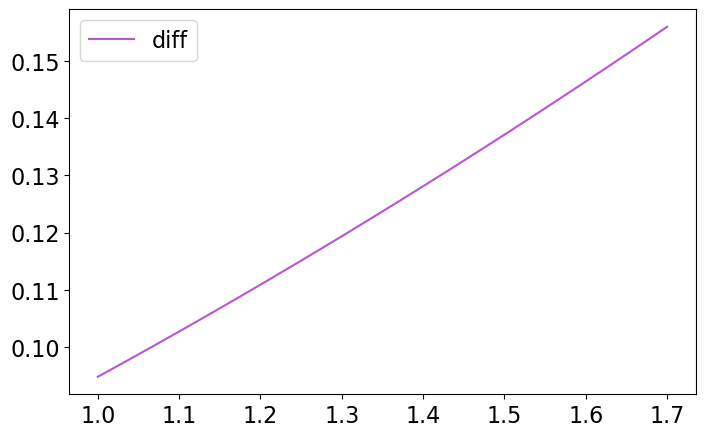

In [104]:
plt.figure()
plt.plot(Ms2,(jesse_relation(R,Ms2) - jr_mean(R,Ms2,beta=np.mean(bootstrap2,axis=0))),label='diff')
# plt.plot(Ms2,,label='mean')
plt.legend()
plt.show()

/home/alexander/.local/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


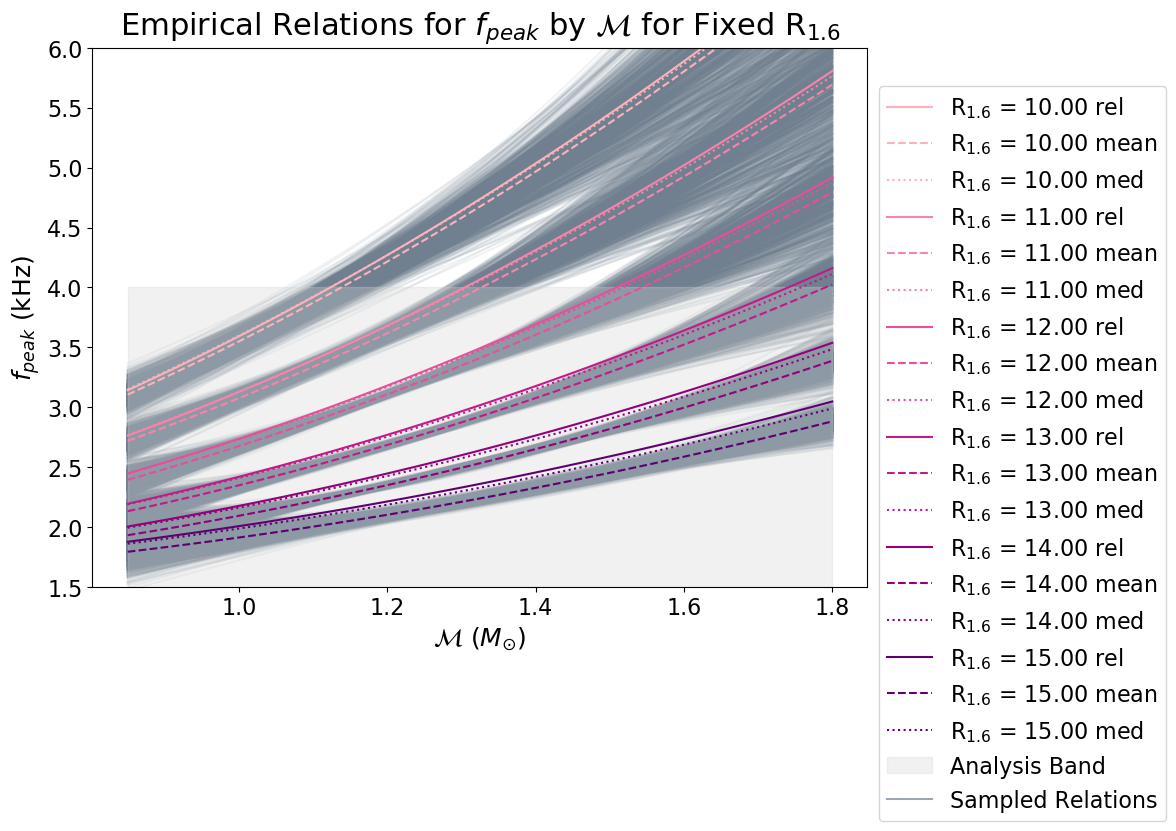

In [95]:
Rs2 = [10,11,12,13,14,15]#np.linspace(9,15,5)
Ms2 = np.linspace(0.85,1.8,100)
plt.figure(figsize=(10,7))
cmap = matplotlib.cm.get_cmap('RdPu')
for R in Rs2:
#     colnum = (R - Rs2.min())/(Rs2.max() - Rs2.min())
    colnum = (R - 7.5)/(8)
    plt.plot(Ms2,empirical_relation_bootstrap(R,Ms2.reshape(-1,1),bootstrap2),alpha=0.1,
             color='slategray',label='__nolabel__',zorder=-10)
    plt.plot(Ms2,jesse_relation(R,Ms2),label='$\mathrm{R_{1.6}}$'+' = {:0.2f} rel'.format(R),color=cmap(colnum))
    plt.plot(Ms2,jr_mean(R,Ms2,beta=np.mean(bootstrap2,axis=0)),label='$\mathrm{R_{1.6}}$'+' = {:0.2f} mean'.format(R),color=cmap(colnum),ls='--')
    plt.plot(Ms2,jr_median(R,Ms2,beta=np.median(bootstrap2,axis=0)),label='$\mathrm{R_{1.6}}$'+' = {:0.2f} med'.format(R),color=cmap(colnum),ls=':')
#     plt.plot(Ms2,empirical_relation_new(R,Ms2),label='$\mathrm{R_{1.6}}$'+' = {:0.2f} (J)'.format(R),color=cmap(colnum))
plt.gca().set_rasterization_zorder(0)
plt.fill_between(Ms2,1.5,4,color='lightgrey',alpha=0.3,label='Analysis Band')
plt.ylim(1.5,6)
gray_line = mlines.Line2D([], [], color='slategray',alpha=0.7,label='Sampled Relations')
# magenta_line = mlines.Line2D([], [], color='mediumorchid',alpha=0.7,label='Sampled Relations')
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles=handles+[gray_line],bbox_to_anchor=(1,0.95))#loc='upper left')
# plt.legend(bbox_to_anchor=(1,.95))
plt.ylabel('$f_{peak}$ (kHz)',fontsize=18)
plt.xlabel('$\mathcal{M}$ ($M_{\odot}$)',fontsize=18)
plt.title('Empirical Relations for $f_{peak}$ by $\mathcal{M}$ for Fixed $\mathrm{R_{1.6}}$',
          fontsize=22,y=1.01)
# plt.savefig('./figures/empirical_relation_fixedR_withsamples.pdf',bbox_inches='tight')
# plt.savefig('./figures/empirical_relation_fixedR_withsamples.png',bbox_inches='tight')
plt.show()

/home/alexander/.local/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


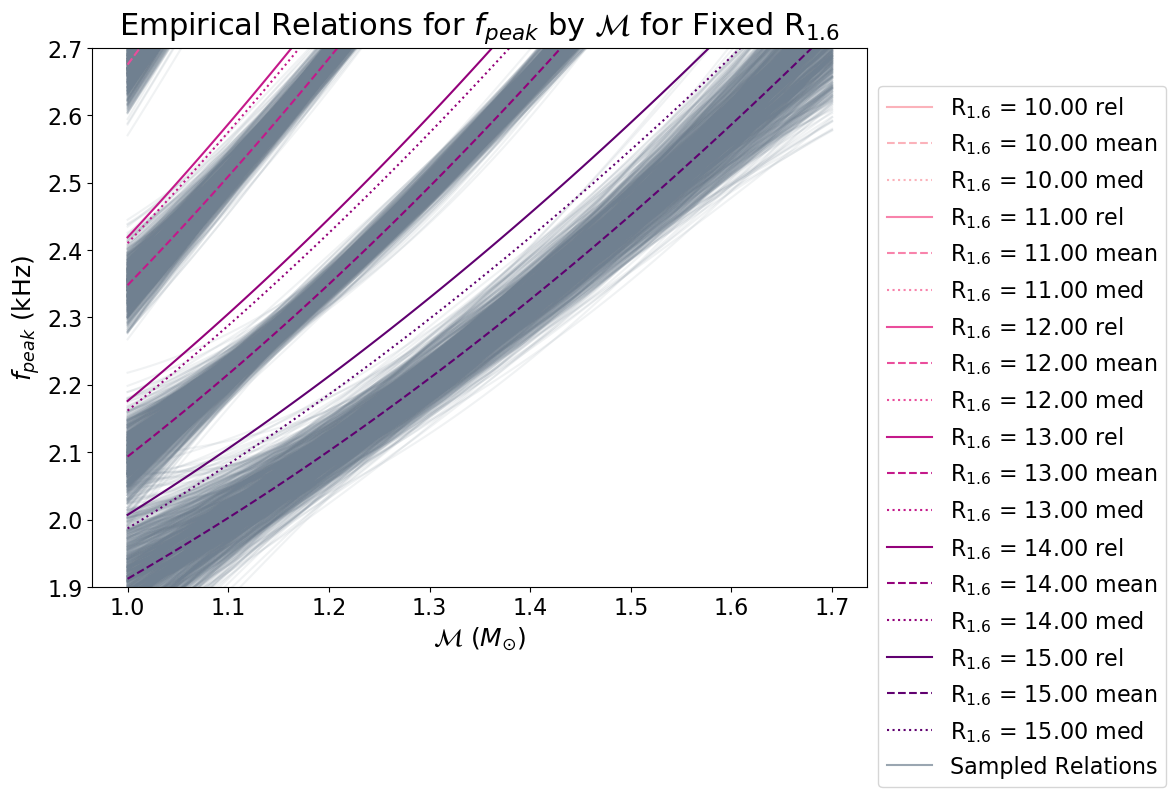

In [96]:
Rs2 = [10,11,12,13,14,15]#np.linspace(9,15,5)
Ms2 = np.linspace(1,1.7,100)
plt.figure(figsize=(10,7))
cmap = matplotlib.cm.get_cmap('RdPu')
for R in Rs2:
#     colnum = (R - Rs2.min())/(Rs2.max() - Rs2.min())
    colnum = (R - 7.5)/(8)
    plt.plot(Ms2,empirical_relation_bootstrap(R,Ms2.reshape(-1,1),bootstrap2),alpha=0.1,
             color='slategray',label='__nolabel__',zorder=-10)
    plt.plot(Ms2,jesse_relation(R,Ms2),label='$\mathrm{R_{1.6}}$'+' = {:0.2f} rel'.format(R),color=cmap(colnum))
    plt.plot(Ms2,jr_mean(R,Ms2,beta=np.mean(bootstrap2,axis=0)),label='$\mathrm{R_{1.6}}$'+' = {:0.2f} mean'.format(R),color=cmap(colnum),ls='--')
    plt.plot(Ms2,jr_median(R,Ms2,beta=np.median(bootstrap2,axis=0)),label='$\mathrm{R_{1.6}}$'+' = {:0.2f} med'.format(R),color=cmap(colnum),ls=':')
#     plt.plot(Ms2,empirical_relation_new(R,Ms2),label='$\mathrm{R_{1.6}}$'+' = {:0.2f} (J)'.format(R),color=cmap(colnum))
plt.gca().set_rasterization_zorder(0)
# plt.fill_between(Ms2,1.5,4,color='lightgrey',alpha=0.3,label='Analysis Band')
plt.ylim(1.9,2.7)
gray_line = mlines.Line2D([], [], color='slategray',alpha=0.7,label='Sampled Relations')
# magenta_line = mlines.Line2D([], [], color='mediumorchid',alpha=0.7,label='Sampled Relations')
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles=handles+[gray_line],bbox_to_anchor=(1,0.95))#loc='upper left')
# plt.legend(bbox_to_anchor=(1,.95))
plt.ylabel('$f_{peak}$ (kHz)',fontsize=18)
plt.xlabel('$\mathcal{M}$ ($M_{\odot}$)',fontsize=18)
plt.title('Empirical Relations for $f_{peak}$ by $\mathcal{M}$ for Fixed $\mathrm{R_{1.6}}$',
          fontsize=22,y=1.01)
# plt.savefig('./figures/empirical_relation_fixedR_withsamples.pdf',bbox_inches='tight')
# plt.savefig('./figures/empirical_relation_fixedR_withsamples.png',bbox_inches='tight')
plt.show()

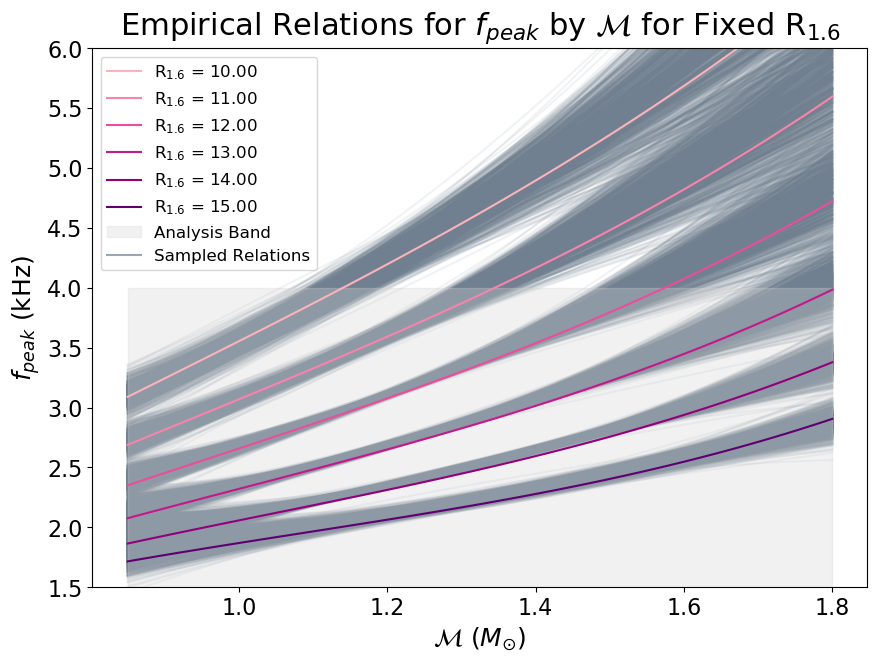

In [40]:
Rs2 = [10,11,12,13,14,15]#np.linspace(9,15,5)
Ms2 = np.linspace(0.85,1.8,100)
plt.figure(figsize=(10,7))
cmap = matplotlib.cm.get_cmap('RdPu')
for R in Rs2:
#     colnum = (R - Rs2.min())/(Rs2.max() - Rs2.min())
    colnum = (R - 7.5)/(8)
    plt.plot(Ms2,empirical_relation_bootstrap(R,Ms2.reshape(-1,1),bootstrap),alpha=0.1,
             color='slategray',label='__nolabel__',zorder=-10)
    plt.plot(Ms2,empirical_relation_f(R,Ms2),label='$\mathrm{R_{1.6}}$'+' = {:0.2f}'.format(R),color=cmap(colnum))
#     plt.plot(Ms2,empirical_relation_new(R,Ms2),label='$\mathrm{R_{1.6}}$'+' = {:0.2f} (J)'.format(R),color=cmap(colnum))
plt.gca().set_rasterization_zorder(0)
plt.fill_between(Ms2,1.5,4,color='lightgrey',alpha=0.3,label='Analysis Band')
plt.ylim(1.5,6)
gray_line = mlines.Line2D([], [], color='slategray',alpha=0.7,label='Sampled Relations')
# magenta_line = mlines.Line2D([], [], color='mediumorchid',alpha=0.7,label='Sampled Relations')
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles=handles+[gray_line],loc='upper left')
# plt.legend(bbox_to_anchor=(1,.95))
plt.ylabel('$f_{peak}$ (kHz)',fontsize=18)
plt.xlabel('$\mathcal{M}$ ($M_{\odot}$)',fontsize=18)
plt.title('Empirical Relations for $f_{peak}$ by $\mathcal{M}$ for Fixed $\mathrm{R_{1.6}}$',
          fontsize=22,y=1.01)
# plt.savefig('./figures/empirical_relation_fixedR_withsamples.pdf',bbox_inches='tight')
# plt.savefig('./figures/empirical_relation_fixedR_withsamples.png',bbox_inches='tight')
plt.show()

In [37]:
a = np.array([1,2,3])
b = 'default'
c = None

In [38]:
type(a), type(b), type(c)

(numpy.ndarray, str, NoneType)

In [3]:
help(plot_reconstruction_with_fpeak)

Help on function plot_reconstruction_with_fpeak in module hbpm_utils:

plot_reconstruction_with_fpeak(powerspec_info, psd_info, injected_spectrum, fpeak_post, xlim=(1500.0, 4000.0), recon_ylim=None, bins=100, saveto=None, xticks=None, xlabel='Frequency (Hz)', suptitle=None, **legend_kwargs)
    Function to make a stacked plot of a BayesWave post-merger signal reconstruction with corresponding fpeak posterior samples.
    
    Arguments:
        powerspec_info (tuple) : reconstructed power spectrum data; see get_reconstruction_data() above
        psd_info (tuple) : instrumental noise power spectrum data; see get_reconstruction_data() above
        injected_spectrum (array) : injected signal data; see get_reconstruction_data() above
        fpeak_post (array) : Peak frequency posterior samples
        xlim (tuple) : matplotlib xlim if desired (shared by both plots)
        recon_ylim (tuple) : matplotlib ylim for the reconstruction plot, if desired
        bins (int) : Number of bins to

In [14]:
NEMO30_powerspec, NEMO30_psd, NEMO30_inj = get_reconstruction_data('../bayeswave_figure_data/NEMO_103109_30Mpc-broad/')
NEMO70_powerspec, NEMO70_psd, NEMO70_inj = get_reconstruction_data('../bayeswave_figure_data/NEMO_103109_70Mpc-broad/')

In [15]:
NEMO30_fpeak = load_BayesWave_fpeak('../bayeswave_figure_data/NEMO_103109_30Mpc-broad/'+'/fpeak/',
                                    rng=np.random.default_rng(42),use_prior='no')
NEMO70_fpeak = load_BayesWave_fpeak('../bayeswave_figure_data/NEMO_103109_70Mpc-broad/'+'/fpeak/',
                                    rng=np.random.default_rng(42),use_prior='no')

In [16]:
BWinterp = interp1d(NEMO30_psd[0],BW_power2strain(NEMO30_psd[0],NEMO30_psd[1])/np.power(NEMO30_psd[0],1/4),
                    fill_value='extrapolate')
origin_interp = interp1d(noisedict['NEMO'][:,0],noisedict['NEMO'][:,1],fill_value='extrapolate')

/home/alexander/.local/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.


In [17]:
NEMO30_psd[0].min()

0

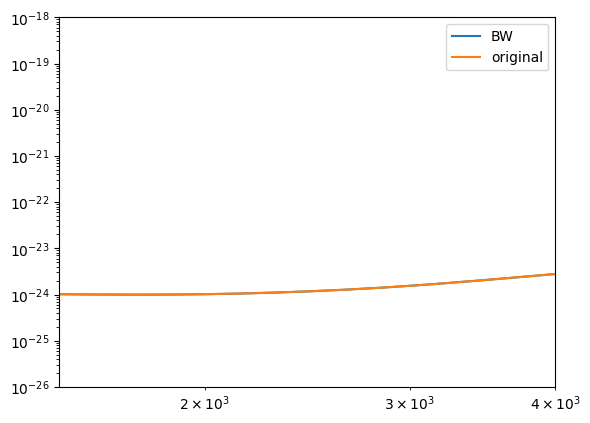

In [77]:
plt.figure()
plt.loglog(NEMO30_psd[0],BWinterp(NEMO30_psd[0]),label='BW')#/origin_interp(NEMO30_psd[0]))
plt.loglog(NEMO30_psd[0],origin_interp(NEMO30_psd[0]),label='original')#/origin_interp(NEMO30_psd[0]))
plt.axvline(NEMO30_psd[0].min(),ls='--',c='k')
plt.axvline(NEMO30_psd[0].max(),ls='--',c='k')
plt.xlim(1.5e3,4e3)
plt.ylim(1e-26,1e-18)
plt.legend()
plt.show()

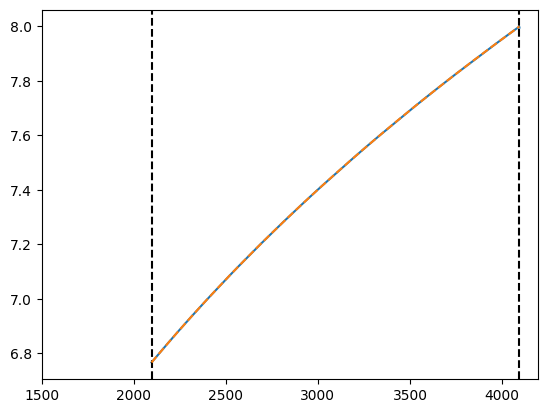

In [67]:
plt.figure()
plt.plot(NEMO30_psd[0][-2000:],BWinterp(NEMO30_psd[0][-2000:])/origin_interp(NEMO30_psd[0][-2000:]))
plt.axvline(NEMO30_psd[0][-2000:].min(),ls='--',c='k')
plt.axvline(NEMO30_psd[0][-2000:].max(),ls='--',c='k')
plt.xlim(1.5e3,)
# plt.ylim(0,10)
plt.plot(NEMO30_psd[0][-2000:],np.sqrt(np.sqrt(NEMO30_psd[0][-2000:])),ls='--')
plt.show()

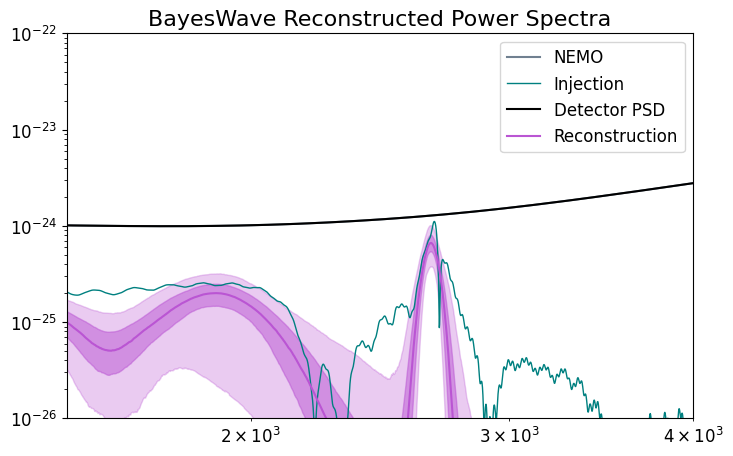

In [79]:
plt.figure()
plt.loglog(noisedict['NEMO'][:,0],noisedict['NEMO'][:,1],
         label='NEMO',color='slategrey')
plot_reconstruction_spec_on_ax(plt.gca(),NEMO30_powerspec, NEMO30_psd, NEMO30_inj,
                               y_units='strain',ylim=(1e-26,1e-22))

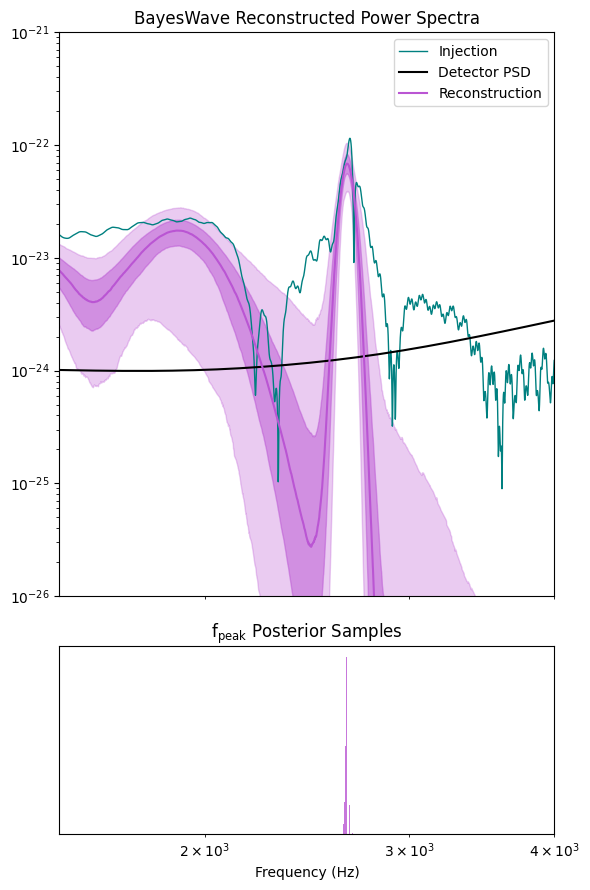

In [103]:
plot_reconstruction_with_fpeak(NEMO30_powerspec, NEMO30_psd, NEMO30_inj, NEMO30_fpeak,
                               y_units='strain',recon_ylim=(1e-26,1e-21))

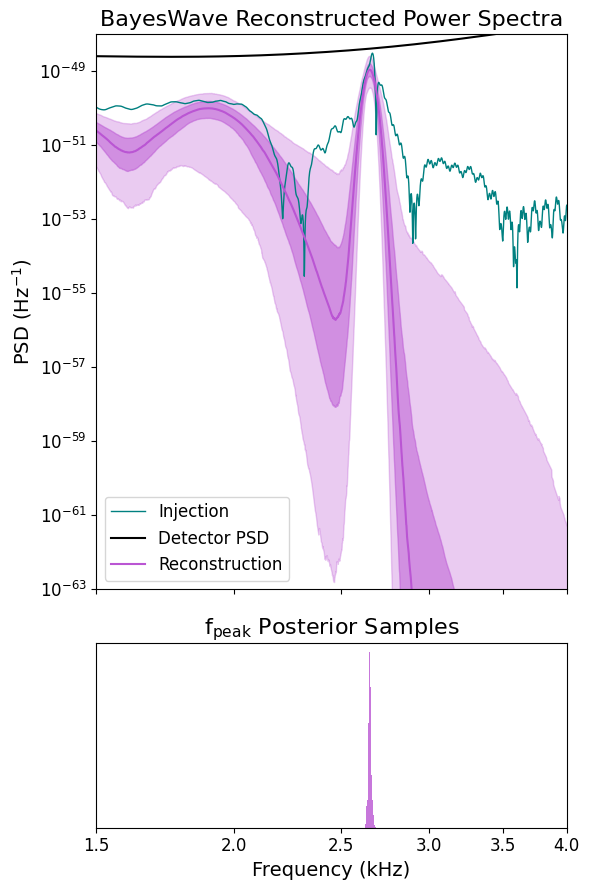

In [48]:
plot_reconstruction_with_fpeak(NEMO30_powerspec, NEMO30_psd, NEMO30_inj, NEMO30_fpeak,
                               y_units='power',recon_ylim=(1e-63,1e-48),bins=20,
                               saveto='./figures/bwfpeak_good.pdf')

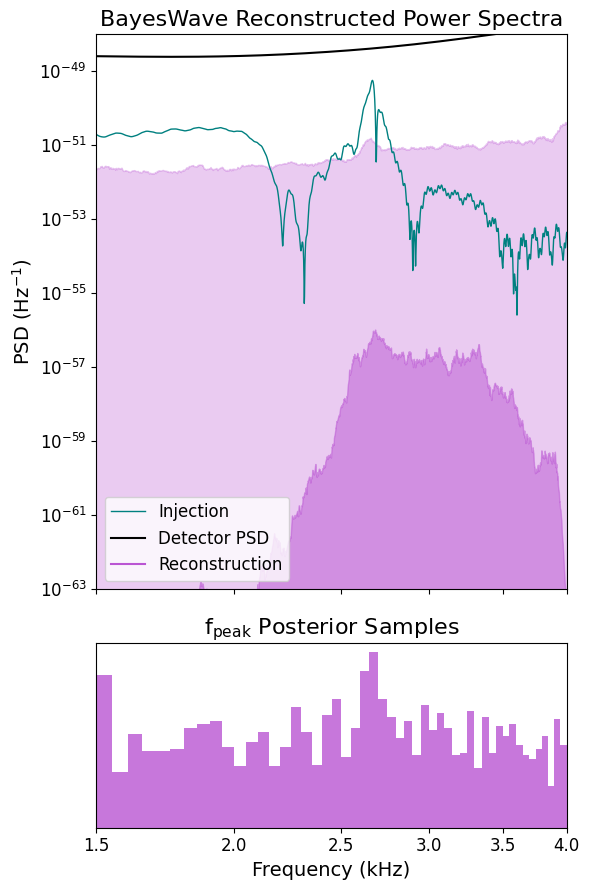

In [50]:
plot_reconstruction_with_fpeak(NEMO70_powerspec, NEMO70_psd, NEMO70_inj, NEMO70_fpeak,
                               y_units='power',recon_ylim=(1e-63,1e-48),bins=50,
                               saveto='./figures/bwfpeak_marginal.pdf')

In [63]:
help(load_BayesWave_fpeak)

Help on function load_BayesWave_fpeak in module hbpm_utils:

load_BayesWave_fpeak(datadir, rng, ifos=['H1', 'L1'], nsamp=2500, bwfmin=1000, bwfmax=5000, fmin=1500, fmax=4000, use_prior='array', prior=None, priordir=None)
    Function to load a BayesWave peak frequency recovery, using the BayesWave fpeak prior.
    
    Arguments:
        datadir (str) : location of BayesWave fpeak output directory
        rng (Generator) : Numpy RNG instance (e.g. np.random.default_rng(seed))
        ifos (list of str) : detector ifos. Can be any combination of H1, L1, and V1, e.g. ['H1','L1']
        nsamp (int) : Total number of samples in the fpeak recovery.
        bwfmin (int) : Minimum frequency (in Hz) of the *BayesWave* peak frequency analysis.
        bwfmax (int) : Maximum frequency (in Hz) of the *BayesWave* peak frequency analysis.
        fmin (int) : Minimum frequency (in Hz) considered in *this* analysis. Samples are filtered accordingly.
        fmax (int) : Maximum frequency (in Hz) co

In [65]:
wline_samps = load_BayesWave_fpeak('/mnt/c/Users/Alexander/Documents/LIGO/PM/BWruns/HLV_runs/wline_test/sfhx_103109_30Mpc/fpeak/',
                                    rng=np.random.default_rng(42),use_prior='no',ifos=['H1'])

In [68]:
wline_powerspec, wline_psd, wline_inj = get_reconstruction_data('/mnt/c/Users/Alexander/Documents/LIGO/PM/BWruns/HLV_runs/wline_test/sfhx_103109_30Mpc/')
# NEMO70_powerspec, NEMO70_psd, NEMO70_inj = get_reconstruction_data('../bayeswave_figure_data/NEMO_103109_70Mpc-broad/')

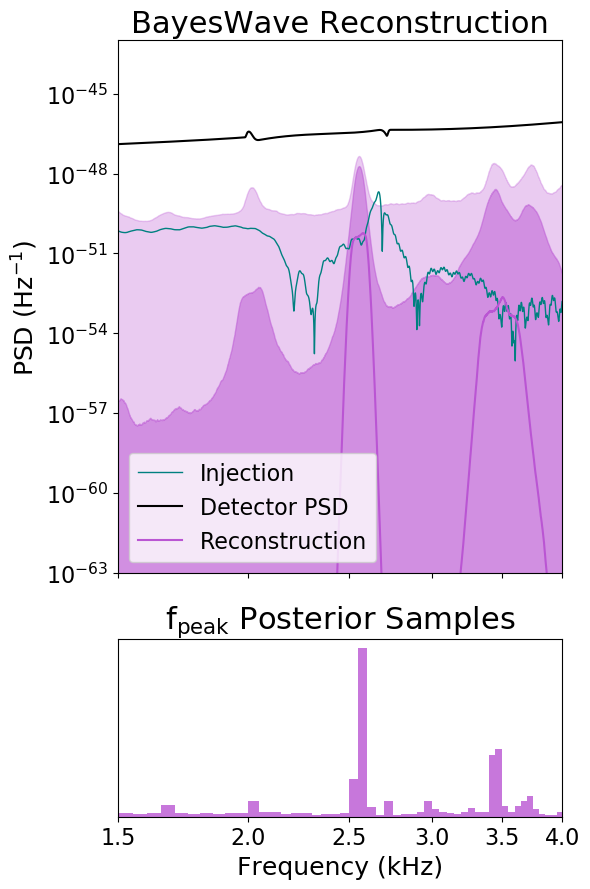

In [73]:
plot_reconstruction_with_fpeak(wline_powerspec, wline_psd, wline_inj, wline_samps,
                               y_units='power',recon_ylim=(1e-63,1e-43),bins=50,
                               saveto=None,title="BayesWave Reconstruction")

In [74]:
wline50_samps = load_BayesWave_fpeak('/mnt/c/Users/Alexander/Documents/LIGO/PM/BWruns/HLV_runs/wline_test/sfhx_103109_50Mpc/fpeak/',
                                    rng=np.random.default_rng(42),use_prior='no',ifos=['H1'])

In [79]:
wline50_powerspec, wline50_psd, wline50_inj = get_reconstruction_data('/mnt/c/Users/Alexander/Documents/LIGO/PM/BWruns/HLV_runs/wline_test/sfhx_103109_50Mpc/')
# NEMO70_powerspec, NEMO70_psd, NEMO70_inj = get_reconstruction_data('../bayeswave_figure_data/NEMO_103109_70Mpc-broad/')

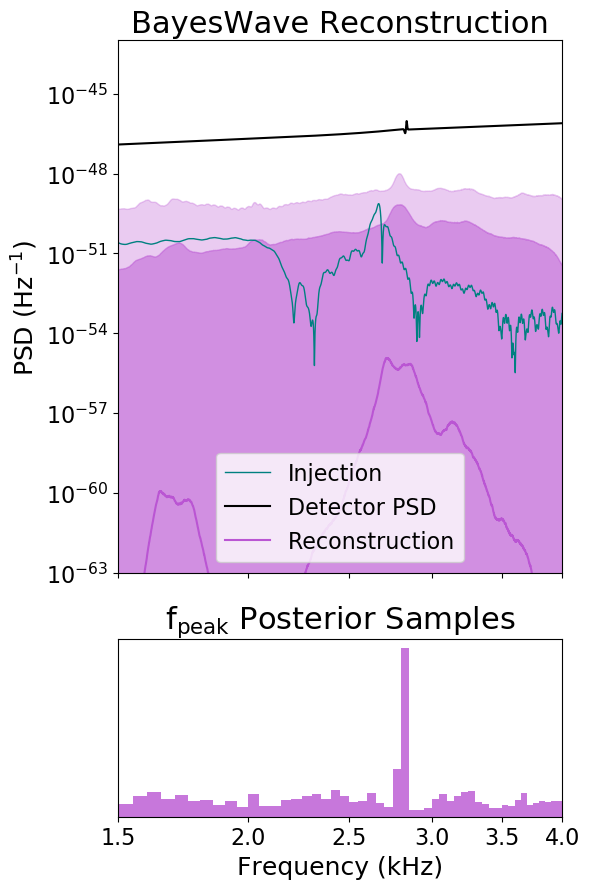

In [80]:
plot_reconstruction_with_fpeak(wline50_powerspec, wline50_psd, wline50_inj, wline50_samps,
                               y_units='power',recon_ylim=(1e-63,1e-43),bins=50,
                               saveto=None,title="BayesWave Reconstruction")

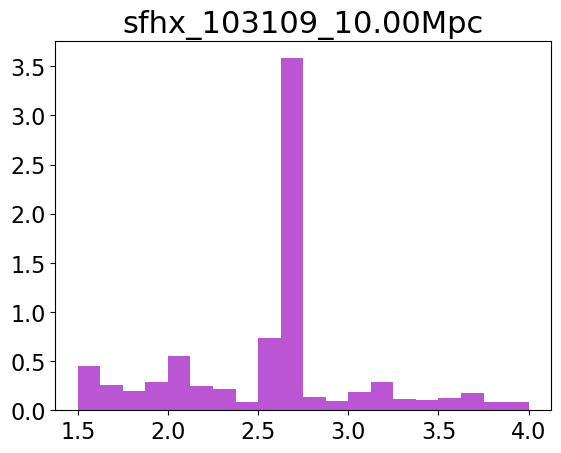

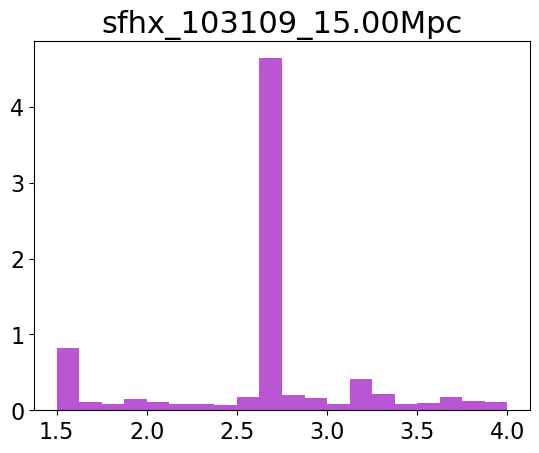

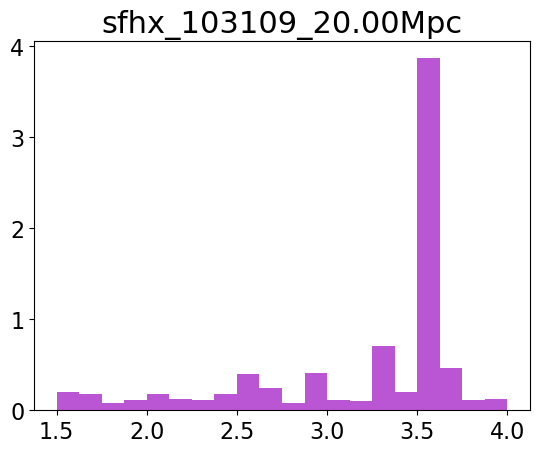

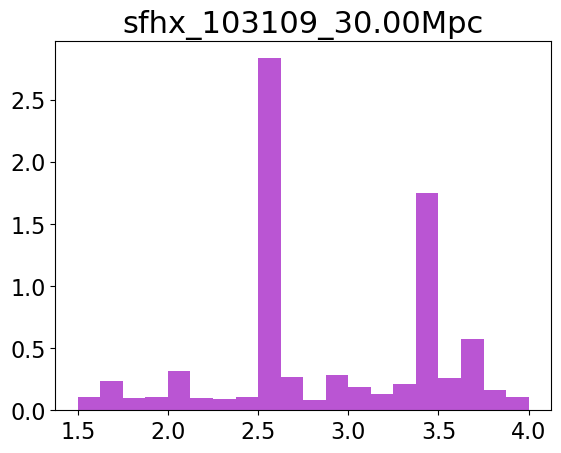

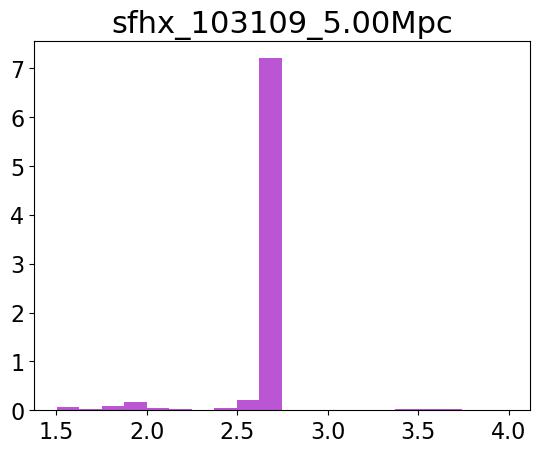

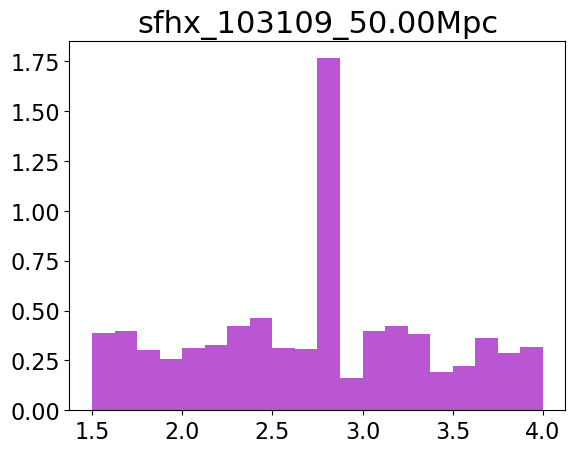

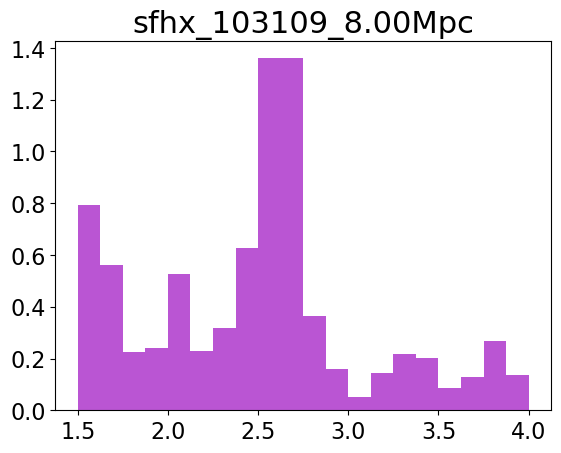

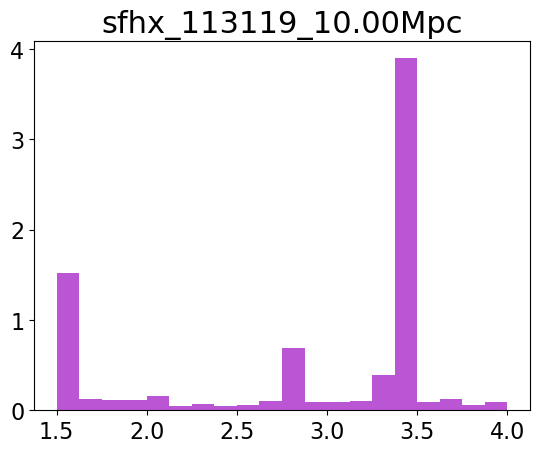

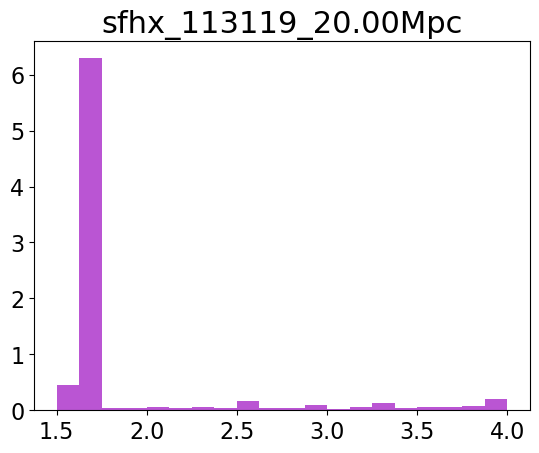

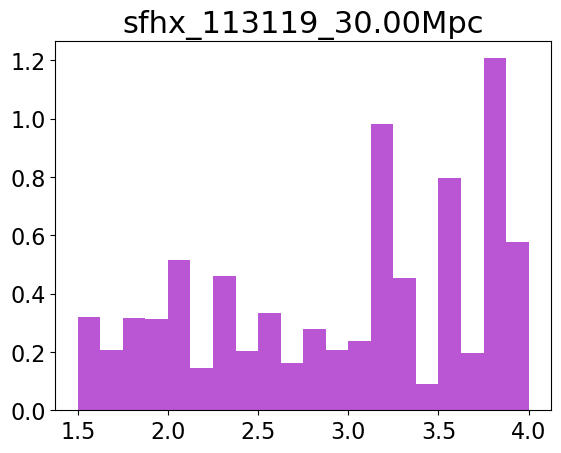

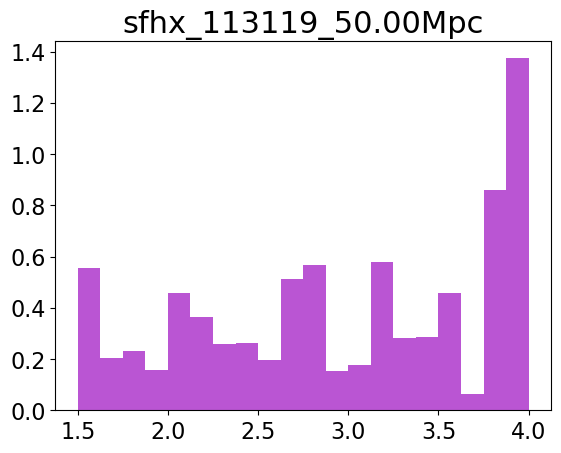

In [186]:
from glob import glob
wline_loc = '/mnt/c/Users/Alexander/Documents/LIGO/PM/BWruns/HLV_runs/wline_test/paper_figs_all/*'
for folder in glob(wline_loc):
#     print(folder.split('/')[-1])
    wline_samps_i = load_BayesWave_fpeak(folder,
                                    rng=np.random.default_rng(42),use_prior='no',ifos=['H1'])
    plt.figure()
    plt.title(folder.split('/')[-1])
    plt.hist(wline_samps_i/1000,density=True,bins=20)
    plt.show()

In [185]:
sfhx_event_list[np.abs(sfhx_event_list['m1'] - 1.13)<0.001]

,file,fpeak,q,m1,m2
96,sfhx_mtot2times1.1600_q0.9500_id2poles.dat,2844.074188,0.95,1.130256,1.189744


## Model Validation Scaling Plot
I'm being horribly inconsistent putting this code here, but the other notebook is running something else, so.

In [105]:
## save!!
with open('./paper_data/model_validation_data/2000_event_synthetic_multiSNR_scaling.pickle','rb') as file:
    scaling_data_dict = dill.load(file)

In [107]:
scaling_dict = scaling_data_dict['CI_scaling']

In [112]:
len(scaling_dict['5'])

2000

Including N_s=5, which is real wonky because of the low signal strength:

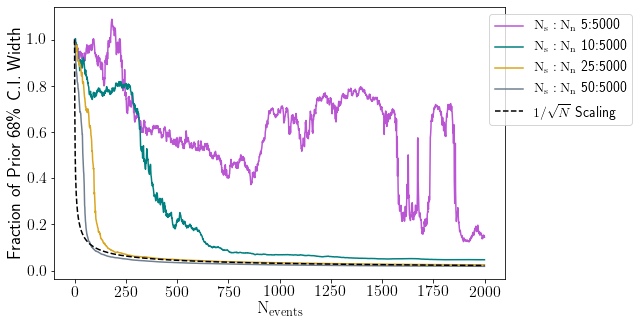

In [123]:
start = (scaling_dict[str(5)][:,2] - scaling_dict[str(5)][:,1])[0]
N = len(scaling_dict['5'])
plt.figure()
for key in scaling_dict.keys() :
    plt.plot((scaling_dict[key][:,2] - scaling_dict[key][:,1])/start,label="$\mathrm{N_s:N_n}$"+" {}:5000".format(key))
plt.plot(1/np.sqrt(np.linspace(1,N,N)),label="$1/\sqrt{N}$ Scaling",color='k',ls='--')
plt.legend(bbox_to_anchor=(0.95,1))
plt.ylabel("Fraction of Prior 68\% C.I. Width")
plt.xlabel("$\mathrm{N_{events}}$")
# plt.yscale('log')
plt.show()

Linear:

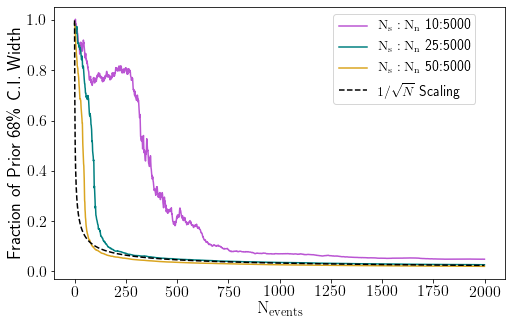

In [120]:
start = (scaling_dict[str(5)][:,2] - scaling_dict[str(5)][:,1])[0]
N = len(scaling_dict['5'])
plt.figure()
goodkeys = [key for key in scaling_dict.keys() if key not in ['5']]
for key in goodkeys:
    plt.plot((scaling_dict[key][:,2] - scaling_dict[key][:,1])/start,label="$\mathrm{N_s:N_n}$"+" {}:5000".format(key))
plt.plot(1/np.sqrt(np.linspace(1,N,N)),label="$1/\sqrt{N}$ Scaling",color='k',ls='--')
plt.legend(bbox_to_anchor=(0.95,1))
plt.ylabel("Fraction of Prior 68\% C.I. Width")
plt.xlabel("$\mathrm{N_{events}}$")
# plt.yscale('log')
plt.show()
    

Log:

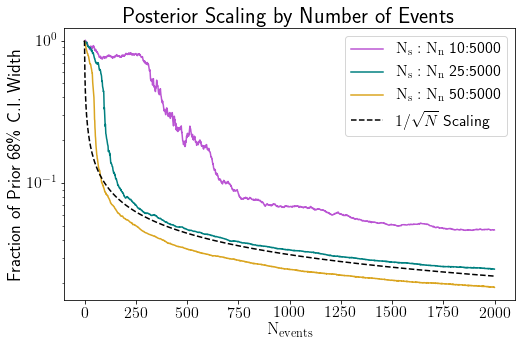

In [144]:
start = (scaling_dict[str(5)][:,2] - scaling_dict[str(5)][:,1])[0]
N = len(scaling_dict['5'])
plt.figure()
goodkeys = [key for key in scaling_dict.keys() if key not in ['5']]
for key in goodkeys:
    plt.plot((scaling_dict[key][:,2] - scaling_dict[key][:,1])/start,label="$\mathrm{N_s:N_n}$"+" {}:5000".format(key))
plt.plot(1/np.sqrt(np.linspace(1,N,N)),label="$1/\sqrt{N}$ Scaling",color='k',ls='--')
plt.legend(loc='upper right',fontsize=16)
plt.ylabel("Fraction of Prior 68\% C.I. Width")
plt.xlabel("$\mathrm{N_{events}}$")
plt.yscale('log')
plt.title("Posterior Scaling by Number of Events")#$\mathrm{N_{events}}$")
# plt.tight_layout()
# plt.yticks('log')
plt.savefig('./figures/post_scale68_2k.png',bbox_inches='tight')
plt.savefig('./figures/post_scale68_2k.pdf',bbox_inches='tight')
plt.show()

Another way to think about this: the slope goes to the same as $1/\sqrt{N}$, but because the analysis has made different gains by the time it does so, the normalization doesn't match up. Try switching where we normalize:

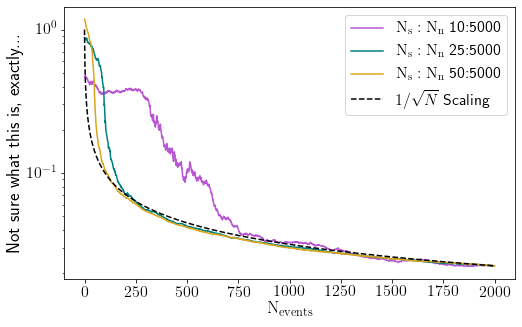

In [141]:
start = (scaling_dict[str(5)][:,2] - scaling_dict[str(5)][:,1])[0]
end = (1/np.sqrt(np.linspace(1,N,N)))[-1]
N = len(scaling_dict['5'])
plt.figure()
goodkeys = [key for key in scaling_dict.keys() if key not in ['5']]
for key in goodkeys:
    norm = end/((scaling_dict[key][:,2] - scaling_dict[key][:,1])[-1])
    plt.plot((scaling_dict[key][:,2] - scaling_dict[key][:,1])*norm,label="$\mathrm{N_s:N_n}$"+" {}:5000".format(key))
plt.plot(1/np.sqrt(np.linspace(1,N,N)),label="$1/\sqrt{N}$ Scaling",color='k',ls='--')
plt.legend(loc='upper right',fontsize=16)
plt.ylabel("Not sure what this is, exactly...")#"Fraction of Prior 68\% C.I. Width")
plt.xlabel("$\mathrm{N_{events}}$")
plt.yscale('log')
plt.show()
    